In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path_1 = './data/서울시_구별 하수도 및 부대시설 현황.csv'
path_2 = './data/서울시건물최종정보.csv'

In [3]:
path_3 = './data/서울시_침수흔적도.csv'

In [4]:
import pandas as pd
import chardet

# 파일을 바이너리 모드로 열어서 인코딩 감지
file_path = path_1

with open(file_path, 'rb') as file:
    raw_data = file.read()
    result = chardet.detect(raw_data)
    encoding = result['encoding']

# 감지된 인코딩으로 DataFrame 읽기
하수도_df = pd.read_csv(file_path, encoding=encoding)
하수도_df.head()

# 파일을 바이너리 모드로 열어서 인코딩 감지
file_path = path_2

with open(file_path, 'rb') as file:
    raw_data = file.read()
    result = chardet.detect(raw_data)
    encoding = result['encoding']

# 감지된 인코딩으로 DataFrame 읽기
건물_df = pd.read_csv(file_path, encoding=encoding)
건물_df.head()


C:\Users\user\AppData\Local\Temp\ipykernel_18384\640197093.py:25: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  건물_df = pd.read_csv(file_path, encoding=encoding)


,법정동명,구,지번,특수지구분명,건축물용도명,건축물구조명,건축물면적(㎡),연면적,대지면적(㎡),높이(m),...,건축물ID,위반건축물여부,데이터기준일자,지상층_수,지하층_수,데이터생성변경일자,사용승인연도,20년_30년미만,30년_이상,건물연령
0,서울특별시 종로구 숭인동,종로구,704,일반,단독주택,기타강구조,57.60,203.13,100.6,9.1,...,29692,N,2024-07-03,3.0,0.0,2017-05-30,1991,False,True,33
1,서울특별시 종로구 숭인동,종로구,56-24,일반,단독주택,벽돌구조,0.00,114.98,0.0,0.0,...,12540,N,2024-07-03,3.0,0.0,2018-06-19,1967,False,True,57
2,서울특별시 종로구 숭인동,종로구,56-54,일반,단독주택,벽돌구조,0.00,135.20,0.0,0.0,...,24867,N,2024-07-03,2.0,0.0,2017-02-24,1962,False,True,62
3,서울특별시 종로구 숭인동,종로구,56-53,일반,단독주택,벽돌구조,0.00,230.18,0.0,0.0,...,13915,N,2024-07-03,2.0,1.0,2018-11-06,1979,False,True,45
4,서울특별시 종로구 이화동,종로구,28-41,일반,제2종근린생활시설,철근콘크리트구조,100.05,598.27,229.8,14.7,...,17029,N,2024-07-03,5.0,1.0,2017-03-30,1994,False,True,30


In [5]:
침수_df = pd.read_csv(path_3)

In [6]:
침수_df.head()

,자치구,침수수심,침수원인,침수평균해발고도,침수면적,행정코드,침수시작날짜,침수종료날짜,침수시작시간,침수종료시간,침수내용,주소,침수연도,침수지역정보,지오메트리
0,강북구,0.02,2022년 8.8 ~17. 호우,114.53,3876.0,1130510400,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 296-1,2022,주택,"POLYGON ((956425.1271956386 1963792.043624141,..."
1,강북구,0.02,2022년 8.8 ~17. 호우,118.05,2188.0,1130510400,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 299-2,2022,주택,"POLYGON ((956590.6408143371 1963700.11134354, ..."
2,강북구,0.02,2022년 8.8 ~17. 호우,129.55,45287.0,1130510400,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 산8-15,2022,주택,"POLYGON ((956383.2795007367 1963392.863235048,..."
3,영등포구,0.30,2022년 8.8 ~17. 호우,10.18,53.0,1156010400,20220808,20220810,20,24,내수침수,서울특별시 영등포구 영등포동3가 13-7,2022,상가,"POLYGON ((947842.214000747 1946702.945905377, ..."
4,강북구,0.02,2022년 8.8 ~17. 호우,75.48,105.0,1130510100,20220808,20220808,18,23,내수침수,서울특별시 강북구 미아동 258-241,2022,주택,"POLYGON ((958804.352649358 1958357.276617252, ..."


# 전처리

In [7]:
print(하수도_df.shape)
print(건물_df.shape)
print(침수_df.shape)

(535, 10)
(544492, 22)
(9724, 15)


In [8]:
건물_df.isnull().sum()

법정동명             0
구                0
지번               0
특수지구분명           0
건축물용도명       17204
건축물구조명       17245
건축물면적(㎡)        59
연면적              0
대지면적(㎡)        502
높이(m)           74
건폐율(%)         597
용적율(%)         617
건축물ID        17234
위반건축물여부      21684
데이터기준일자          0
지상층_수           27
지하층_수          456
데이터생성변경일자    36013
사용승인연도           0
20년_30년미만        0
30년_이상           0
건물연령             0
dtype: int64

In [9]:
침수_df.isnull().sum()

자치구            0
침수수심           0
침수원인           0
침수평균해발고도       0
침수면적           0
행정코드           0
침수시작날짜         0
침수종료날짜         0
침수시작시간         0
침수종료시간         0
침수내용           0
주소             0
침수연도           0
침수지역정보      1056
지오메트리          0
dtype: int64

In [10]:
# import re

# # 동이 포함된 단락을 추출하는 함수
# def extract_dong(address):
#     parts = address.split()  # 공백을 기준으로 분리
#     for part in parts:
#         if '동' in part or '가' or '로' in part:  # '동'이 포함된 단락 찾기
#             return part
#     return None

# # 자치구 추출 및 새로운 컬럼에 저장

# 건물_df['행정동'] = 건물_df['법정동명'].apply(extract_dong)
# 침수_df['행정동'] = 침수_df['주소'].apply(extract_dong)

In [11]:
건물_df.head()

,법정동명,구,지번,특수지구분명,건축물용도명,건축물구조명,건축물면적(㎡),연면적,대지면적(㎡),높이(m),...,건축물ID,위반건축물여부,데이터기준일자,지상층_수,지하층_수,데이터생성변경일자,사용승인연도,20년_30년미만,30년_이상,건물연령
0,서울특별시 종로구 숭인동,종로구,704,일반,단독주택,기타강구조,57.60,203.13,100.6,9.1,...,29692,N,2024-07-03,3.0,0.0,2017-05-30,1991,False,True,33
1,서울특별시 종로구 숭인동,종로구,56-24,일반,단독주택,벽돌구조,0.00,114.98,0.0,0.0,...,12540,N,2024-07-03,3.0,0.0,2018-06-19,1967,False,True,57
2,서울특별시 종로구 숭인동,종로구,56-54,일반,단독주택,벽돌구조,0.00,135.20,0.0,0.0,...,24867,N,2024-07-03,2.0,0.0,2017-02-24,1962,False,True,62
3,서울특별시 종로구 숭인동,종로구,56-53,일반,단독주택,벽돌구조,0.00,230.18,0.0,0.0,...,13915,N,2024-07-03,2.0,1.0,2018-11-06,1979,False,True,45
4,서울특별시 종로구 이화동,종로구,28-41,일반,제2종근린생활시설,철근콘크리트구조,100.05,598.27,229.8,14.7,...,17029,N,2024-07-03,5.0,1.0,2017-03-30,1994,False,True,30


In [12]:
침수_df.head()

,자치구,침수수심,침수원인,침수평균해발고도,침수면적,행정코드,침수시작날짜,침수종료날짜,침수시작시간,침수종료시간,침수내용,주소,침수연도,침수지역정보,지오메트리
0,강북구,0.02,2022년 8.8 ~17. 호우,114.53,3876.0,1130510400,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 296-1,2022,주택,"POLYGON ((956425.1271956386 1963792.043624141,..."
1,강북구,0.02,2022년 8.8 ~17. 호우,118.05,2188.0,1130510400,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 299-2,2022,주택,"POLYGON ((956590.6408143371 1963700.11134354, ..."
2,강북구,0.02,2022년 8.8 ~17. 호우,129.55,45287.0,1130510400,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 산8-15,2022,주택,"POLYGON ((956383.2795007367 1963392.863235048,..."
3,영등포구,0.30,2022년 8.8 ~17. 호우,10.18,53.0,1156010400,20220808,20220810,20,24,내수침수,서울특별시 영등포구 영등포동3가 13-7,2022,상가,"POLYGON ((947842.214000747 1946702.945905377, ..."
4,강북구,0.02,2022년 8.8 ~17. 호우,75.48,105.0,1130510100,20220808,20220808,18,23,내수침수,서울특별시 강북구 미아동 258-241,2022,주택,"POLYGON ((958804.352649358 1958357.276617252, ..."


In [13]:
건물_df.columns

Index(['법정동명', '구', '지번', '특수지구분명', '건축물용도명', '건축물구조명', '건축물면적(㎡)', '연면적',
       '대지면적(㎡)', '높이(m)', '건폐율(%)', '용적율(%)', '건축물ID', '위반건축물여부', '데이터기준일자',
       '지상층_수', '지하층_수', '데이터생성변경일자', '사용승인연도', '20년_30년미만', '30년_이상', '건물연령'],
      dtype='object')

In [14]:
건물_col = ['법정동명', '구', '지번', '건축물면적(㎡)', '연면적','대지면적(㎡)', '높이(m)', '건폐율(%)', '용적율(%)','지상층_수', '지하층_수','20년_30년미만', '30년_이상', '건물연령']

In [15]:
침수_df.columns

Index(['자치구', '침수수심', '침수원인', '침수평균해발고도', '침수면적', '행정코드', '침수시작날짜', '침수종료날짜',
       '침수시작시간', '침수종료시간', '침수내용', '주소', '침수연도', '침수지역정보', '지오메트리'],
      dtype='object')

In [16]:
침수_col = ['자치구', '침수수심', '침수원인', '침수평균해발고도', '침수면적', '행정코드', '침수시작날짜', '침수종료날짜','침수시작시간', '침수종료시간', '침수내용', '주소', '침수연도','지오메트리']

In [17]:
건물_df = 건물_df[건물_col]
침수_df = 침수_df[침수_col]

In [18]:
법정동코드 = pd.read_csv('./data/국토교통부_법정동코드_20230918.csv', encoding='cp949')

In [19]:
법정동코드 = 법정동코드[법정동코드['존재여부'] =='존재']

In [20]:
법정동코드[법정동코드['소재지'] =='서울특별시 강북구 우이동']

,코드명,소재지,존재여부
193,1130510400,서울특별시 강북구 우이동,존재


In [21]:
건물_df

,법정동명,구,지번,건축물면적(㎡),연면적,대지면적(㎡),높이(m),건폐율(%),용적율(%),지상층_수,지하층_수,20년_30년미만,30년_이상,건물연령
0,서울특별시 종로구 숭인동,종로구,704,57.60,203.13,100.60,9.10,57.26,144.66202,3.0,0.0,False,True,33
1,서울특별시 종로구 숭인동,종로구,56-24,0.00,114.98,0.00,0.00,0.00,0.00000,3.0,0.0,False,True,57
2,서울특별시 종로구 숭인동,종로구,56-54,0.00,135.20,0.00,0.00,0.00,0.00000,2.0,0.0,False,True,62
3,서울특별시 종로구 숭인동,종로구,56-53,0.00,230.18,0.00,0.00,0.00,0.00000,2.0,1.0,False,True,45
4,서울특별시 종로구 이화동,종로구,28-41,100.05,598.27,229.80,14.70,43.53,204.66000,5.0,1.0,False,True,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544487,서울특별시 용산구 후암동,용산구,267-2,67.76,213.32,136.00,7.10,49.82,99.68000,2.0,1.0,False,True,34
544488,서울특별시 용산구 후암동,용산구,48-12,62.46,189.09,104.32,7.60,59.87,116.12000,2.0,1.0,True,False,29
544489,서울특별시 서초구 서초동,서초구,1593-7,1158.04,40043.80,2896.60,68.44,39.98,914.41000,24.0,6.0,True,False,21
544490,서울특별시 광진구 자양동,광진구,851-19,144.16,870.66,291.00,15.00,49.54,237.04000,5.0,1.0,False,True,31


In [22]:
건물_df = pd.merge(건물_df, 법정동코드, left_on='법정동명', right_on='소재지', how='left')

In [23]:
침수_df

,자치구,침수수심,침수원인,침수평균해발고도,침수면적,행정코드,침수시작날짜,침수종료날짜,침수시작시간,침수종료시간,침수내용,주소,침수연도,지오메트리
0,강북구,0.02,2022년 8.8 ~17. 호우,114.53,3876.0,1130510400,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 296-1,2022,"POLYGON ((956425.1271956386 1963792.043624141,..."
1,강북구,0.02,2022년 8.8 ~17. 호우,118.05,2188.0,1130510400,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 299-2,2022,"POLYGON ((956590.6408143371 1963700.11134354, ..."
2,강북구,0.02,2022년 8.8 ~17. 호우,129.55,45287.0,1130510400,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 산8-15,2022,"POLYGON ((956383.2795007367 1963392.863235048,..."
3,영등포구,0.30,2022년 8.8 ~17. 호우,10.18,53.0,1156010400,20220808,20220810,20,24,내수침수,서울특별시 영등포구 영등포동3가 13-7,2022,"POLYGON ((947842.214000747 1946702.945905377, ..."
4,강북구,0.02,2022년 8.8 ~17. 호우,75.48,105.0,1130510100,20220808,20220808,18,23,내수침수,서울특별시 강북구 미아동 258-241,2022,"POLYGON ((958804.352649358 1958357.276617252, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9719,서초구,0.50,2016년 7.1~7 호우·강풍·풍랑,25.54,255.8,1165010300,20160701,20160707,5,11,침수(도로범람유입),서초구 우면동 7-9,2016,"POLYGON ((958123.183223994 1941219.14245448, 9..."
9720,서초구,0.10,2016년 7.1~7 호우·강풍·풍랑,30.96,355.0,1165010300,20160701,20160707,2,8,산사태,서초구 우면동 601-6,2016,"POLYGON ((956896.4209098449 1940024.680317544,..."
9721,서초구,0.50,2016년 7.1~7 호우·강풍·풍랑,36.40,157.2,1165010100,20160701,20160707,3,9,침수(공공하수도역류),서초구 방배동 900-16,2016,"POLYGON ((955480.6519485153 1943160.119171099,..."
9722,서초구,0.50,2016년 7.1~7 호우·강풍·풍랑,23.81,335.4,1165010100,20160701,20160707,10,16,침수(공공하수도역류),서초구 방배동 921-23,2016,"POLYGON ((955291.9295173265 1942740.946714553,..."


In [24]:
건물_df.rename(columns={'구':'자치구'}, inplace=True)

In [25]:
건물_df.rename(columns={'코드명':'행정코드'}, inplace=True)

In [26]:
건물_df

,법정동명,자치구,지번,건축물면적(㎡),연면적,대지면적(㎡),높이(m),건폐율(%),용적율(%),지상층_수,지하층_수,20년_30년미만,30년_이상,건물연령,행정코드,소재지,존재여부
0,서울특별시 종로구 숭인동,종로구,704,57.60,203.13,100.60,9.10,57.26,144.66202,3.0,0.0,False,True,33,1111017500,서울특별시 종로구 숭인동,존재
1,서울특별시 종로구 숭인동,종로구,56-24,0.00,114.98,0.00,0.00,0.00,0.00000,3.0,0.0,False,True,57,1111017500,서울특별시 종로구 숭인동,존재
2,서울특별시 종로구 숭인동,종로구,56-54,0.00,135.20,0.00,0.00,0.00,0.00000,2.0,0.0,False,True,62,1111017500,서울특별시 종로구 숭인동,존재
3,서울특별시 종로구 숭인동,종로구,56-53,0.00,230.18,0.00,0.00,0.00,0.00000,2.0,1.0,False,True,45,1111017500,서울특별시 종로구 숭인동,존재
4,서울특별시 종로구 이화동,종로구,28-41,100.05,598.27,229.80,14.70,43.53,204.66000,5.0,1.0,False,True,30,1111016500,서울특별시 종로구 이화동,존재
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544487,서울특별시 용산구 후암동,용산구,267-2,67.76,213.32,136.00,7.10,49.82,99.68000,2.0,1.0,False,True,34,1117010100,서울특별시 용산구 후암동,존재
544488,서울특별시 용산구 후암동,용산구,48-12,62.46,189.09,104.32,7.60,59.87,116.12000,2.0,1.0,True,False,29,1117010100,서울특별시 용산구 후암동,존재
544489,서울특별시 서초구 서초동,서초구,1593-7,1158.04,40043.80,2896.60,68.44,39.98,914.41000,24.0,6.0,True,False,21,1165010800,서울특별시 서초구 서초동,존재
544490,서울특별시 광진구 자양동,광진구,851-19,144.16,870.66,291.00,15.00,49.54,237.04000,5.0,1.0,False,True,31,1121510500,서울특별시 광진구 자양동,존재


In [27]:
건물_df['행정코드'].dtype

dtype('int64')

In [28]:
침수_df['행정코드'].dtype

dtype('int64')

In [29]:
len(건물_df['자치구'].unique())

25

In [30]:
len(침수_df['자치구'].unique())

24

In [31]:
건물_df

,법정동명,자치구,지번,건축물면적(㎡),연면적,대지면적(㎡),높이(m),건폐율(%),용적율(%),지상층_수,지하층_수,20년_30년미만,30년_이상,건물연령,행정코드,소재지,존재여부
0,서울특별시 종로구 숭인동,종로구,704,57.60,203.13,100.60,9.10,57.26,144.66202,3.0,0.0,False,True,33,1111017500,서울특별시 종로구 숭인동,존재
1,서울특별시 종로구 숭인동,종로구,56-24,0.00,114.98,0.00,0.00,0.00,0.00000,3.0,0.0,False,True,57,1111017500,서울특별시 종로구 숭인동,존재
2,서울특별시 종로구 숭인동,종로구,56-54,0.00,135.20,0.00,0.00,0.00,0.00000,2.0,0.0,False,True,62,1111017500,서울특별시 종로구 숭인동,존재
3,서울특별시 종로구 숭인동,종로구,56-53,0.00,230.18,0.00,0.00,0.00,0.00000,2.0,1.0,False,True,45,1111017500,서울특별시 종로구 숭인동,존재
4,서울특별시 종로구 이화동,종로구,28-41,100.05,598.27,229.80,14.70,43.53,204.66000,5.0,1.0,False,True,30,1111016500,서울특별시 종로구 이화동,존재
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544487,서울특별시 용산구 후암동,용산구,267-2,67.76,213.32,136.00,7.10,49.82,99.68000,2.0,1.0,False,True,34,1117010100,서울특별시 용산구 후암동,존재
544488,서울특별시 용산구 후암동,용산구,48-12,62.46,189.09,104.32,7.60,59.87,116.12000,2.0,1.0,True,False,29,1117010100,서울특별시 용산구 후암동,존재
544489,서울특별시 서초구 서초동,서초구,1593-7,1158.04,40043.80,2896.60,68.44,39.98,914.41000,24.0,6.0,True,False,21,1165010800,서울특별시 서초구 서초동,존재
544490,서울특별시 광진구 자양동,광진구,851-19,144.16,870.66,291.00,15.00,49.54,237.04000,5.0,1.0,False,True,31,1121510500,서울특별시 광진구 자양동,존재


In [32]:
건물_df_영등포 = 건물_df[건물_df['자치구'] == '영등포구']
건물_df_영등포

,법정동명,자치구,지번,건축물면적(㎡),연면적,대지면적(㎡),높이(m),건폐율(%),용적율(%),지상층_수,지하층_수,20년_30년미만,30년_이상,건물연령,행정코드,소재지,존재여부
9435,서울특별시 영등포구 영등포동2가,영등포구,94-155,1199.710,17352.040,2163.00,61.00,55.47,569.16,14.0,3.0,False,False,5,1156010300,서울특별시 영등포구 영등포동2가,존재
9537,서울특별시 영등포구 신길동,영등포구,268-21,127.560,120.960,99.57,0.00,124.42,121.48,2.0,0.0,False,True,52,1156013200,서울특별시 영등포구 신길동,존재
9777,서울특별시 영등포구 신길동,영등포구,4579,148.870,787.510,320.29,0.00,46.48,170.50,4.0,1.0,False,True,41,1156013200,서울특별시 영등포구 신길동,존재
9806,서울특별시 영등포구 여의도동,영등포구,14-27,491.490,9453.900,NaN,39.90,NaN,NaN,13.0,4.0,False,True,36,1156011000,서울특별시 영등포구 여의도동,존재
17685,서울특별시 영등포구 문래동3가,영등포구,10,1464.000,1897.990,0.00,0.00,0.00,0.00,1.0,1.0,False,True,52,1156012100,서울특별시 영등포구 문래동3가,존재
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540290,서울특별시 영등포구 대림동,영등포구,710-13,356.500,1596.000,869.70,0.00,40.99,135.43,4.0,1.0,False,True,31,1156013300,서울특별시 영등포구 대림동,존재
540355,서울특별시 영등포구 신길동,영등포구,4273-12,470.230,4109.260,1129.96,29.35,41.61,247.36,7.0,2.0,False,False,17,1156013200,서울특별시 영등포구 신길동,존재
540356,서울특별시 영등포구 영등포동2가,영등포구,217,89.750,297.280,0.00,0.00,0.00,0.00,3.0,1.0,False,True,48,1156010300,서울특별시 영등포구 영등포동2가,존재
540511,서울특별시 영등포구 당산동6가,영등포구,342,466.450,3230.140,840.70,29.70,55.48,302.32,7.0,1.0,False,False,11,1156011600,서울특별시 영등포구 당산동6가,존재


In [33]:
건물_df_영등포.columns

Index(['법정동명', '자치구', '지번', '건축물면적(㎡)', '연면적', '대지면적(㎡)', '높이(m)', '건폐율(%)',
       '용적율(%)', '지상층_수', '지하층_수', '20년_30년미만', '30년_이상', '건물연령', '행정코드',
       '소재지', '존재여부'],
      dtype='object')

In [34]:
건물_df_영등포 = 건물_df_영등포[['법정동명', '지번','건축물면적(㎡)', '연면적', '대지면적(㎡)', '높이(m)', '건폐율(%)','용적율(%)', '지상층_수', '지하층_수','30년_이상', '건물연령', '행정코드']]

In [35]:
침수_df

,자치구,침수수심,침수원인,침수평균해발고도,침수면적,행정코드,침수시작날짜,침수종료날짜,침수시작시간,침수종료시간,침수내용,주소,침수연도,지오메트리
0,강북구,0.02,2022년 8.8 ~17. 호우,114.53,3876.0,1130510400,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 296-1,2022,"POLYGON ((956425.1271956386 1963792.043624141,..."
1,강북구,0.02,2022년 8.8 ~17. 호우,118.05,2188.0,1130510400,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 299-2,2022,"POLYGON ((956590.6408143371 1963700.11134354, ..."
2,강북구,0.02,2022년 8.8 ~17. 호우,129.55,45287.0,1130510400,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 산8-15,2022,"POLYGON ((956383.2795007367 1963392.863235048,..."
3,영등포구,0.30,2022년 8.8 ~17. 호우,10.18,53.0,1156010400,20220808,20220810,20,24,내수침수,서울특별시 영등포구 영등포동3가 13-7,2022,"POLYGON ((947842.214000747 1946702.945905377, ..."
4,강북구,0.02,2022년 8.8 ~17. 호우,75.48,105.0,1130510100,20220808,20220808,18,23,내수침수,서울특별시 강북구 미아동 258-241,2022,"POLYGON ((958804.352649358 1958357.276617252, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9719,서초구,0.50,2016년 7.1~7 호우·강풍·풍랑,25.54,255.8,1165010300,20160701,20160707,5,11,침수(도로범람유입),서초구 우면동 7-9,2016,"POLYGON ((958123.183223994 1941219.14245448, 9..."
9720,서초구,0.10,2016년 7.1~7 호우·강풍·풍랑,30.96,355.0,1165010300,20160701,20160707,2,8,산사태,서초구 우면동 601-6,2016,"POLYGON ((956896.4209098449 1940024.680317544,..."
9721,서초구,0.50,2016년 7.1~7 호우·강풍·풍랑,36.40,157.2,1165010100,20160701,20160707,3,9,침수(공공하수도역류),서초구 방배동 900-16,2016,"POLYGON ((955480.6519485153 1943160.119171099,..."
9722,서초구,0.50,2016년 7.1~7 호우·강풍·풍랑,23.81,335.4,1165010100,20160701,20160707,10,16,침수(공공하수도역류),서초구 방배동 921-23,2016,"POLYGON ((955291.9295173265 1942740.946714553,..."


In [36]:
침수_df_22 = 침수_df[침수_df['침수연도'] == 2022]
침수_df_22

,자치구,침수수심,침수원인,침수평균해발고도,침수면적,행정코드,침수시작날짜,침수종료날짜,침수시작시간,침수종료시간,침수내용,주소,침수연도,지오메트리
0,강북구,0.02,2022년 8.8 ~17. 호우,114.53,3876.00,1130510400,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 296-1,2022,"POLYGON ((956425.1271956386 1963792.043624141,..."
1,강북구,0.02,2022년 8.8 ~17. 호우,118.05,2188.00,1130510400,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 299-2,2022,"POLYGON ((956590.6408143371 1963700.11134354, ..."
2,강북구,0.02,2022년 8.8 ~17. 호우,129.55,45287.00,1130510400,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 산8-15,2022,"POLYGON ((956383.2795007367 1963392.863235048,..."
3,영등포구,0.30,2022년 8.8 ~17. 호우,10.18,53.00,1156010400,20220808,20220810,20,24,내수침수,서울특별시 영등포구 영등포동3가 13-7,2022,"POLYGON ((947842.214000747 1946702.945905377, ..."
4,강북구,0.02,2022년 8.8 ~17. 호우,75.48,105.00,1130510100,20220808,20220808,18,23,내수침수,서울특별시 강북구 미아동 258-241,2022,"POLYGON ((958804.352649358 1958357.276617252, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8663,용산구,0.10,2022년 8.8 ~17. 호우,14.38,151.71,1117013100,20220808,20220809,21,5,내수침수,서울특별시 용산구 서계동 223-38,2022,"POLYGON ((953001.4488350893 1950724.767063652,..."
8664,용산구,0.10,2022년 8.8 ~17. 호우,56.60,74.09,1117010800,20220808,20220809,21,5,내수침수,서울특별시 용산구 한남동 657-189,2022,"POLYGON ((956323.331303605 1948417.676690162, ..."
8665,용산구,0.10,2022년 8.8 ~17. 호우,17.31,190.53,1117011300,20220808,20220809,21,5,내수침수,서울특별시 용산구 신창동 80-24,2022,"POLYGON ((951822.4880110008 1948650.290386308,..."
8666,성북구,0.10,2022년 8.8 ~17. 호우,84.05,33.97,1129010300,20220808,20220810,19,12,내수침수,서울특별시 성북구 돈암동 74-226,2022,"POLYGON ((957841.0766973767 1955305.179045144,..."


In [37]:
침수_df_22.columns

Index(['자치구', '침수수심', '침수원인', '침수평균해발고도', '침수면적', '행정코드', '침수시작날짜', '침수종료날짜',
       '침수시작시간', '침수종료시간', '침수내용', '주소', '침수연도', '지오메트리'],
      dtype='object')

In [38]:
침수_df_22 = 침수_df_22[['침수수심', '침수원인', '침수평균해발고도', '침수면적', '행정코드','침수시작날짜', '침수종료날짜','침수시작시간', '침수종료시간', '침수내용','지오메트리']]

In [39]:
침수_df_22 = 침수_df_22.drop_duplicates(subset=['행정코드'])

In [40]:
# 데이터프레임 병합
건물_침수_df = pd.merge(건물_df_영등포, 침수_df_22,on='행정코드',how='left')  

In [41]:
건물_침수_df = 건물_침수_df.drop_duplicates()

In [42]:
건물_침수_df

,법정동명,지번,건축물면적(㎡),연면적,대지면적(㎡),높이(m),건폐율(%),용적율(%),지상층_수,지하층_수,...,침수수심,침수원인,침수평균해발고도,침수면적,침수시작날짜,침수종료날짜,침수시작시간,침수종료시간,침수내용,지오메트리
0,서울특별시 영등포구 영등포동2가,94-155,1199.710,17352.040,2163.00,61.00,55.47,569.16,14.0,3.0,...,0.3,2022년 8.8 ~17. 호우,9.72,57.00,20220808.0,20220810,20.0,24.0,내수침수,"POLYGON ((947908.9087317446 1946830.25634417, ..."
1,서울특별시 영등포구 신길동,268-21,127.560,120.960,99.57,0.00,124.42,121.48,2.0,0.0,...,0.3,2022년 8.8 ~17. 호우,14.30,114.25,20220808.0,20220810,20.0,24.0,내수침수,"POLYGON ((947561.6089984437 1944576.64633861, ..."
2,서울특별시 영등포구 신길동,4579,148.870,787.510,320.29,0.00,46.48,170.50,4.0,1.0,...,0.3,2022년 8.8 ~17. 호우,14.30,114.25,20220808.0,20220810,20.0,24.0,내수침수,"POLYGON ((947561.6089984437 1944576.64633861, ..."
3,서울특별시 영등포구 여의도동,14-27,491.490,9453.900,NaN,39.90,NaN,NaN,13.0,4.0,...,0.3,2022년 8.8 ~17. 호우,13.74,33.00,20220808.0,20220810,20.0,24.0,내수침수,"POLYGON ((949653.0648396177 1946809.103421255,..."
4,서울특별시 영등포구 문래동3가,10,1464.000,1897.990,0.00,0.00,0.00,0.00,1.0,1.0,...,0.3,2022년 8.8 ~17. 호우,10.47,46.00,20220808.0,20220810,20.0,24.0,내수침수,"POLYGON ((947120.4038900363 1946360.953357358,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21640,서울특별시 영등포구 대림동,710-13,356.500,1596.000,869.70,0.00,40.99,135.43,4.0,1.0,...,0.3,2022년 8.8 ~17. 호우,14.70,306.45,20220808.0,20220810,20.0,24.0,내수침수,"POLYGON ((947780.3274105673 1943886.278012975,..."
21641,서울특별시 영등포구 신길동,4273-12,470.230,4109.260,1129.96,29.35,41.61,247.36,7.0,2.0,...,0.3,2022년 8.8 ~17. 호우,14.30,114.25,20220808.0,20220810,20.0,24.0,내수침수,"POLYGON ((947561.6089984437 1944576.64633861, ..."
21642,서울특별시 영등포구 영등포동2가,217,89.750,297.280,0.00,0.00,0.00,0.00,3.0,1.0,...,0.3,2022년 8.8 ~17. 호우,9.72,57.00,20220808.0,20220810,20.0,24.0,내수침수,"POLYGON ((947908.9087317446 1946830.25634417, ..."
21643,서울특별시 영등포구 당산동6가,342,466.450,3230.140,840.70,29.70,55.48,302.32,7.0,1.0,...,0.3,2022년 8.8 ~17. 호우,12.70,48.00,20220808.0,20220810,20.0,24.0,내수침수,"POLYGON ((947143.5493483946 1948552.373099132,..."


In [43]:
건물_침수_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21286 entries, 0 to 21644
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   법정동명      21286 non-null  object 
 1   지번        21286 non-null  object 
 2   건축물면적(㎡)  21284 non-null  float64
 3   연면적       21286 non-null  float64
 4   대지면적(㎡)   21263 non-null  float64
 5   높이(m)     21285 non-null  float64
 6   건폐율(%)    21261 non-null  float64
 7   용적율(%)    21261 non-null  float64
 8   지상층_수     21286 non-null  float64
 9   지하층_수     21276 non-null  float64
 10  30년_이상    21286 non-null  bool   
 11  건물연령      21286 non-null  int64  
 12  행정코드      21286 non-null  int64  
 13  침수수심      21135 non-null  float64
 14  침수원인      21135 non-null  object 
 15  침수평균해발고도  21135 non-null  float64
 16  침수면적      21135 non-null  float64
 17  침수시작날짜    21135 non-null  float64
 18  침수종료날짜    21135 non-null  object 
 19  침수시작시간    21135 non-null  float64
 20  침수종료시간    21135 non-null  float64

In [44]:
건물_침수_df.isnull().sum()

법정동명          0
지번            0
건축물면적(㎡)      2
연면적           0
대지면적(㎡)      23
높이(m)         1
건폐율(%)       25
용적율(%)       25
지상층_수         0
지하층_수        10
30년_이상        0
건물연령          0
행정코드          0
침수수심        151
침수원인        151
침수평균해발고도    151
침수면적        151
침수시작날짜      151
침수종료날짜      151
침수시작시간      151
침수종료시간      151
침수내용        151
지오메트리       151
dtype: int64

In [45]:
영등포_침수_non = 건물_침수_df[건물_침수_df['침수수심'].isna()]
영등포_침수_non

,법정동명,지번,건축물면적(㎡),연면적,대지면적(㎡),높이(m),건폐율(%),용적율(%),지상층_수,지하층_수,...,침수수심,침수원인,침수평균해발고도,침수면적,침수시작날짜,침수종료날짜,침수시작시간,침수종료시간,침수내용,지오메트리
740,서울특별시 영등포구 양평동6가,2-2,234.72,2561.41,775.5,45.6,30.27,299.44,14.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
824,서울특별시 영등포구 양평동6가,9-3,204.62,1888.85,438.7,39.2,46.64,359.76,12.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1810,서울특별시 영등포구 양평동6가,84,324.84,1299.36,0.0,0.0,0.00,0.00,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1815,서울특별시 영등포구 양평동6가,55,149.41,443.51,0.0,0.0,0.00,0.00,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900,서울특별시 영등포구 양평동6가,40-2,32.73,32.73,0.0,0.0,0.00,0.00,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21212,서울특별시 영등포구 양평동6가,93-2,309.74,1497.52,562.0,22.9,55.11,249.98,7.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21213,서울특별시 영등포구 양평동6가,93-1,298.84,2356.06,498.5,29.5,59.95,398.84,8.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21214,서울특별시 영등포구 양평동6가,36,169.97,550.64,287.9,16.4,59.04,191.26,5.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21323,서울특별시 영등포구 양평동6가,86,194.71,405.62,0.0,0.0,0.00,0.00,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
건물_침수_df.columns

Index(['법정동명', '지번', '건축물면적(㎡)', '연면적', '대지면적(㎡)', '높이(m)', '건폐율(%)', '용적율(%)',
       '지상층_수', '지하층_수', '30년_이상', '건물연령', '행정코드', '침수수심', '침수원인', '침수평균해발고도',
       '침수면적', '침수시작날짜', '침수종료날짜', '침수시작시간', '침수종료시간', '침수내용', '지오메트리'],
      dtype='object')

In [47]:
# 건물_침수_df.fillna({
#     '침수수심': 0.0,
#     '침수원인': '없음',
#     '침수평균해발고도': 0.0,
#     '침수면적': 0.0,
#     '침수시작날짜': 0,
#     '침수종료날짜': 0,
#     '침수시작시간': 0,
#     '침수종료시간': 0,
#     '침수내용': '없음'
# }, inplace=True)

In [48]:
건물_침수_df.isnull().sum()

법정동명          0
지번            0
건축물면적(㎡)      2
연면적           0
대지면적(㎡)      23
높이(m)         1
건폐율(%)       25
용적율(%)       25
지상층_수         0
지하층_수        10
30년_이상        0
건물연령          0
행정코드          0
침수수심        151
침수원인        151
침수평균해발고도    151
침수면적        151
침수시작날짜      151
침수종료날짜      151
침수시작시간      151
침수종료시간      151
침수내용        151
지오메트리       151
dtype: int64

# 주요 변수 추출

In [49]:
건물_침수_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21286 entries, 0 to 21644
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   법정동명      21286 non-null  object 
 1   지번        21286 non-null  object 
 2   건축물면적(㎡)  21284 non-null  float64
 3   연면적       21286 non-null  float64
 4   대지면적(㎡)   21263 non-null  float64
 5   높이(m)     21285 non-null  float64
 6   건폐율(%)    21261 non-null  float64
 7   용적율(%)    21261 non-null  float64
 8   지상층_수     21286 non-null  float64
 9   지하층_수     21276 non-null  float64
 10  30년_이상    21286 non-null  bool   
 11  건물연령      21286 non-null  int64  
 12  행정코드      21286 non-null  int64  
 13  침수수심      21135 non-null  float64
 14  침수원인      21135 non-null  object 
 15  침수평균해발고도  21135 non-null  float64
 16  침수면적      21135 non-null  float64
 17  침수시작날짜    21135 non-null  float64
 18  침수종료날짜    21135 non-null  object 
 19  침수시작시간    21135 non-null  float64
 20  침수종료시간    21135 non-null  float64

In [50]:
건물_침수_df.describe()

,건축물면적(㎡),연면적,대지면적(㎡),높이(m),건폐율(%),용적율(%),지상층_수,지하층_수,건물연령,행정코드,침수수심,침수평균해발고도,침수면적,침수시작날짜,침수시작시간,침수종료시간
count,21284.000000,21286.000000,2.126300e+04,21285.000000,21261.000000,21261.000000,21286.000000,21276.000000,21286.000000,2.128600e+04,21135.000000,21135.000000,21135.000000,21135.0,21135.0,21135.0
mean,162.770431,1195.371106,8.860439e+02,6.892739,28.969680,88.192403,3.480081,0.755499,34.205205,1.156012e+09,0.302621,13.317669,761.826540,20220808.0,20.0,24.0
std,539.153534,6178.883845,5.674043e+04,12.870241,136.263721,122.119995,3.563031,0.672512,14.949078,1.010764e+03,0.022746,2.331740,1933.707332,0.0,0.0,0.0
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.156010e+09,0.300000,8.170000,32.100000,20220808.0,20.0,24.0
25%,53.520000,142.597500,0.000000e+00,0.000000,0.000000,0.000000,2.000000,0.000000,27.000000,1.156012e+09,0.300000,11.700000,114.250000,20220808.0,20.0,24.0
50%,73.130000,215.725000,0.000000e+00,0.000000,0.000000,0.000000,2.000000,1.000000,33.000000,1.156013e+09,0.300000,14.300000,114.250000,20220808.0,20.0,24.0
75%,120.337500,447.895000,1.514950e+02,10.350000,58.890000,161.150000,4.000000,1.000000,41.000000,1.156013e+09,0.300000,14.700000,306.450000,20220808.0,20.0,24.0
max,29293.340000,340913.780000,8.180000e+06,284.000000,12680.952400,1084.250000,60.000000,8.000000,142.000000,1.156013e+09,0.500000,17.500000,9755.800000,20220808.0,20.0,24.0


In [51]:
건물_침수_df = 건물_침수_df.dropna()

In [52]:
건물_침수_df

,법정동명,지번,건축물면적(㎡),연면적,대지면적(㎡),높이(m),건폐율(%),용적율(%),지상층_수,지하층_수,...,침수수심,침수원인,침수평균해발고도,침수면적,침수시작날짜,침수종료날짜,침수시작시간,침수종료시간,침수내용,지오메트리
0,서울특별시 영등포구 영등포동2가,94-155,1199.710,17352.040,2163.00,61.00,55.47,569.16,14.0,3.0,...,0.3,2022년 8.8 ~17. 호우,9.72,57.00,20220808.0,20220810,20.0,24.0,내수침수,"POLYGON ((947908.9087317446 1946830.25634417, ..."
1,서울특별시 영등포구 신길동,268-21,127.560,120.960,99.57,0.00,124.42,121.48,2.0,0.0,...,0.3,2022년 8.8 ~17. 호우,14.30,114.25,20220808.0,20220810,20.0,24.0,내수침수,"POLYGON ((947561.6089984437 1944576.64633861, ..."
2,서울특별시 영등포구 신길동,4579,148.870,787.510,320.29,0.00,46.48,170.50,4.0,1.0,...,0.3,2022년 8.8 ~17. 호우,14.30,114.25,20220808.0,20220810,20.0,24.0,내수침수,"POLYGON ((947561.6089984437 1944576.64633861, ..."
4,서울특별시 영등포구 문래동3가,10,1464.000,1897.990,0.00,0.00,0.00,0.00,1.0,1.0,...,0.3,2022년 8.8 ~17. 호우,10.47,46.00,20220808.0,20220810,20.0,24.0,내수침수,"POLYGON ((947120.4038900363 1946360.953357358,..."
5,서울특별시 영등포구 신길동,359-11,66.300,265.200,0.00,0.00,0.00,0.00,3.0,1.0,...,0.3,2022년 8.8 ~17. 호우,14.30,114.25,20220808.0,20220810,20.0,24.0,내수침수,"POLYGON ((947561.6089984437 1944576.64633861, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21640,서울특별시 영등포구 대림동,710-13,356.500,1596.000,869.70,0.00,40.99,135.43,4.0,1.0,...,0.3,2022년 8.8 ~17. 호우,14.70,306.45,20220808.0,20220810,20.0,24.0,내수침수,"POLYGON ((947780.3274105673 1943886.278012975,..."
21641,서울특별시 영등포구 신길동,4273-12,470.230,4109.260,1129.96,29.35,41.61,247.36,7.0,2.0,...,0.3,2022년 8.8 ~17. 호우,14.30,114.25,20220808.0,20220810,20.0,24.0,내수침수,"POLYGON ((947561.6089984437 1944576.64633861, ..."
21642,서울특별시 영등포구 영등포동2가,217,89.750,297.280,0.00,0.00,0.00,0.00,3.0,1.0,...,0.3,2022년 8.8 ~17. 호우,9.72,57.00,20220808.0,20220810,20.0,24.0,내수침수,"POLYGON ((947908.9087317446 1946830.25634417, ..."
21643,서울특별시 영등포구 당산동6가,342,466.450,3230.140,840.70,29.70,55.48,302.32,7.0,1.0,...,0.3,2022년 8.8 ~17. 호우,12.70,48.00,20220808.0,20220810,20.0,24.0,내수침수,"POLYGON ((947143.5493483946 1948552.373099132,..."


In [53]:
numeric_df = 건물_침수_df.select_dtypes(include=['float64', 'int64'])

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45572 (\N{HANGUL SYLLABLE NU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49444 (\N{HANGUL SYLLABLE SEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anacon

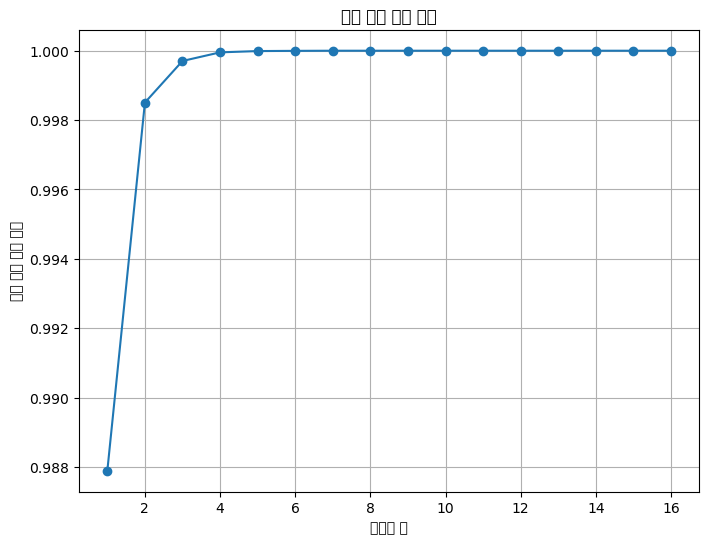

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# PCA를 수행하여 설명력 비율 확인
pca = PCA()
pca.fit(numeric_df)
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# 설명력 비율 시각화
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.title('누적 설명 분산 비율')
plt.xlabel('주성분 수')
plt.ylabel('누적 설명 분산 비율')
plt.grid(True)
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

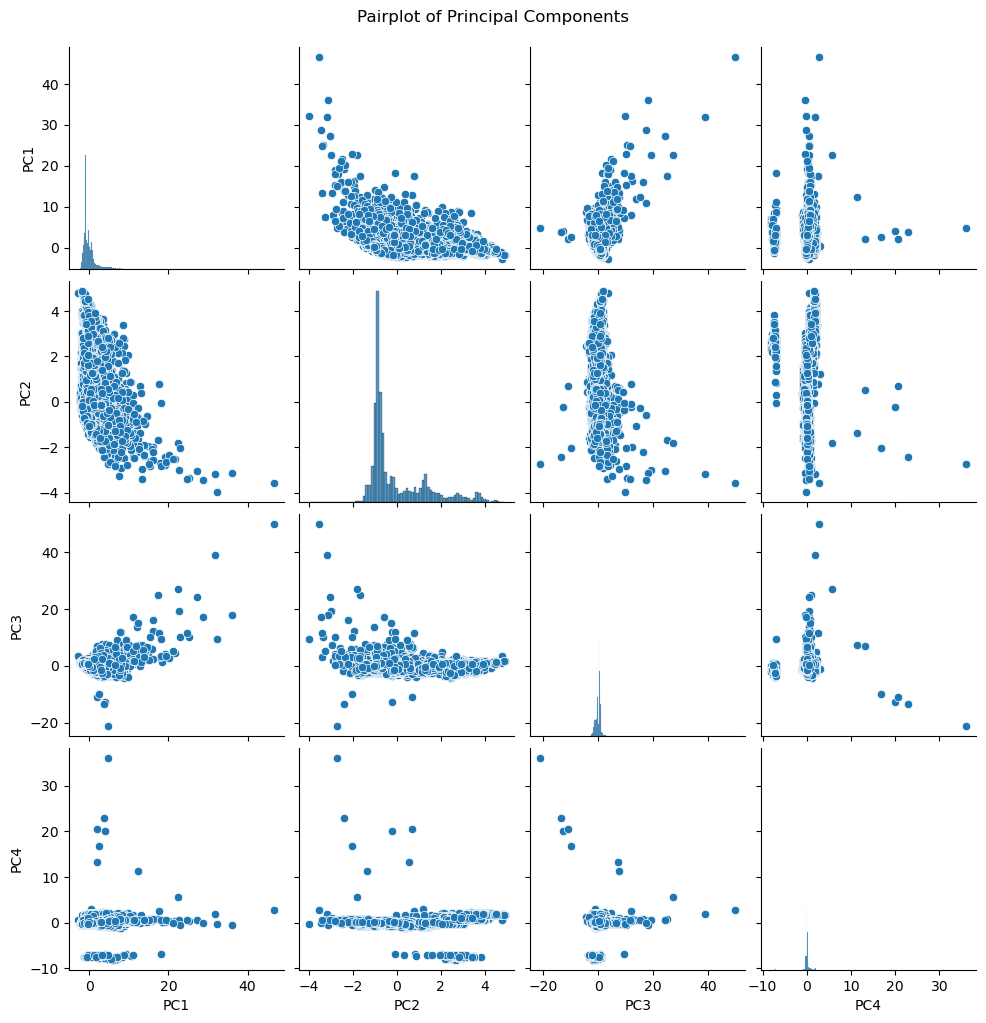

주성분 1 설명력: 0.27
주성분 2 설명력: 0.15
주성분 3 설명력: 0.11
주성분 4 설명력: 0.08


In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 수치형 데이터만 선택
numeric_df = 건물_침수_df.select_dtypes(include=['float64', 'int64'])

# 데이터 표준화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# PCA 적용
pca = PCA(n_components=4)  # 주성분 2개로 축소
pca_result = pca.fit_transform(scaled_data)

# PCA 결과를 데이터프레임으로 변환
pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])

# Pairplot으로 시각화
sns.pairplot(pca_df)
plt.suptitle('Pairplot of Principal Components', y=1.02)
plt.show()

# 각 주성분의 설명력
explained_variance_ratio = pca.explained_variance_ratio_
print(f"주성분 1 설명력: {explained_variance_ratio[0]:.2f}")
print(f"주성분 2 설명력: {explained_variance_ratio[1]:.2f}")
print(f"주성분 3 설명력: {explained_variance_ratio[2]:.2f}")
print(f"주성분 4 설명력: {explained_variance_ratio[3]:.2f}")

In [56]:
pca_df

,PC1,PC2,PC3,PC4
0,8.435644,0.295855,-0.388509,0.277919
1,-1.171183,-0.316675,0.087103,0.261724
2,-0.155175,-0.793155,0.104198,0.108174
3,-0.075097,0.867129,2.380651,-0.175394
4,-0.746530,-0.862948,0.302784,-0.152433
...,...,...,...,...
21096,0.059337,-1.052330,0.153296,0.131327
21097,2.787214,-1.589831,-0.453888,0.141976
21098,-0.355231,2.070228,0.801780,-0.250368
21099,2.950717,-0.123833,-1.295883,0.153321


In [57]:
# PCA 수행
pca = PCA(n_components=4)
pca_result = pca.fit_transform(numeric_df)

# 주성분 벡터 확인
components = pd.DataFrame(pca.components_, columns=numeric_df.columns)
print("주성분 벡터:")
print(components)

# 각 주성분의 설명력
explained_variance = pca.explained_variance_ratio_
print("\n주성분 설명력:")
print(explained_variance)

# 변수의 기여도 분석
for i, component in enumerate(components.values):
    print(f"\n주성분 {i+1}의 변수 기여도:")
    for var, weight in zip(numeric_df.columns, component):
        print(f"{var}: {weight:.4f}")

# 변수 기여도를 절대값으로 정렬
component_contributions = components.abs()
print("\n각 주성분의 변수 기여도(절대값 기준):")
print(component_contributions)

주성분 벡터:
   건축물면적(㎡)       연면적   대지면적(㎡)     높이(m)    건폐율(%)    용적율(%)         지상층_수  \
0  0.000354  0.002164  0.999998  0.000003  0.000021 -0.000005  3.080785e-07   
1  0.068969  0.997340 -0.002189  0.001101  0.000451  0.005714  3.291096e-04   
2  0.001083 -0.002173  0.000068  0.000152  0.000263  0.003231  4.393700e-05   
3 -0.007816  0.023348  0.000266 -0.001561 -0.000422 -0.018535 -5.159895e-04   

          지하층_수      건물연령      행정코드          침수수심      침수평균해발고도      침수면적  \
0  8.615529e-08 -0.000002 -0.000288 -4.178518e-10 -5.784888e-08 -0.000140   
1  4.885912e-05 -0.000242 -0.022452  9.443263e-08 -2.953024e-05 -0.003635   
2 -2.710794e-05  0.000681 -0.249160 -2.902257e-07 -4.623522e-04  0.968453   
3  1.640199e-05 -0.000401  0.967970 -3.890009e-06  9.662274e-04  0.249160   

   침수시작날짜  침수시작시간  침수종료시간  
0    -0.0    -0.0    -0.0  
1    -0.0    -0.0    -0.0  
2    -0.0    -0.0    -0.0  
3     0.0     0.0     0.0  

주성분 설명력:
[9.87889929e-01 1.06154366e-02 1.19891531e-03 2.48319933e-04

In [58]:
component_contributions

,건축물면적(㎡),연면적,대지면적(㎡),높이(m),건폐율(%),용적율(%),지상층_수,지하층_수,건물연령,행정코드,침수수심,침수평균해발고도,침수면적,침수시작날짜,침수시작시간,침수종료시간
0,0.000354,0.002164,0.999998,0.000003,0.000021,0.000005,3.080785e-07,8.615529e-08,0.000002,0.000288,4.178518e-10,5.784888e-08,0.000140,0.0,0.0,0.0
1,0.068969,0.997340,0.002189,0.001101,0.000451,0.005714,3.291096e-04,4.885912e-05,0.000242,0.022452,9.443263e-08,2.953024e-05,0.003635,0.0,0.0,0.0
2,0.001083,0.002173,0.000068,0.000152,0.000263,0.003231,4.393700e-05,2.710794e-05,0.000681,0.249160,2.902257e-07,4.623522e-04,0.968453,0.0,0.0,0.0
3,0.007816,0.023348,0.000266,0.001561,0.000422,0.018535,5.159895e-04,1.640199e-05,0.000401,0.967970,3.890009e-06,9.662274e-04,0.249160,0.0,0.0,0.0


In [59]:
# 상관계수 계산
correlation_matrix = numeric_df.corr()

# 침수수심과 다른 변수들 간의 상관관계 추출
correlation_with_flood_depth = correlation_matrix['침수수심']

# 결과 출력
print("침수수심과 다른 변수들 간의 상관관계:")
print(correlation_with_flood_depth)

침수수심과 다른 변수들 간의 상관관계:
건축물면적(㎡)    0.011522
연면적         0.024027
대지면적(㎡)    -0.001054
높이(m)       0.065567
건폐율(%)      0.002407
용적율(%)      0.048494
지상층_수       0.084557
지하층_수      -0.024159
건물연령       -0.046993
행정코드       -0.124200
침수수심        1.000000
침수평균해발고도   -0.194982
침수면적       -0.043413
침수시작날짜           NaN
침수시작시간           NaN
침수종료시간           NaN
Name: 침수수심, dtype: float64


In [60]:
correlation_with_flood_depth.sort_values(ascending=False)

침수수심        1.000000
지상층_수       0.084557
높이(m)       0.065567
용적율(%)      0.048494
연면적         0.024027
건축물면적(㎡)    0.011522
건폐율(%)      0.002407
대지면적(㎡)    -0.001054
지하층_수      -0.024159
침수면적       -0.043413
건물연령       -0.046993
행정코드       -0.124200
침수평균해발고도   -0.194982
침수시작날짜           NaN
침수시작시간           NaN
침수종료시간           NaN
Name: 침수수심, dtype: float64

In [61]:
temp_df = 건물_침수_df[['지상층_수','높이(m)','용적율(%)','연면적','침수수심']]

In [62]:
# !pip install pandas statsmodels

In [63]:
import statsmodels.api as sm

# 독립 변수와 종속 변수 설정
X = numeric_df.drop(columns=['침수수심'])
y = numeric_df['침수수심']

# 상수항 추가
X = sm.add_constant(X)

# 회귀 모델 적합
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   침수수심   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     115.6
Date:                Fri, 09 Aug 2024   Prob (F-statistic):          1.57e-280
Time:                        09:53:57   Log-Likelihood:                 50585.
No. Observations:               21101   AIC:                        -1.011e+05
Df Residuals:                   21088   BIC:                        -1.010e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
건축물면적(㎡)   -1.244e-06   4.36e-07     -2.852      0.0

In [64]:
# 전체 모델의 설명력이 낮다(R-squared가 0.062). 이 모델은 침수수심의 변동성을 잘 설명하지 못하고 있다.

In [65]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 상수항을 추가합니다 (절편을 포함하기 위함)
df_with_const = add_constant(numeric_df)

# VIF를 계산합니다
vif_data = pd.DataFrame()
vif_data['Variable'] = df_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

print(vif_data)

    Variable       VIF
0   건축물면적(㎡)  2.392212
1        연면적  3.371231
2    대지면적(㎡)  1.002650
3      높이(m)  5.055298
4     건폐율(%)  1.039867
5     용적율(%)  2.113395
6      지상층_수  3.994594
7      지하층_수  1.363418
8       건물연령  1.649965
9       행정코드  1.543985
10      침수수심  1.065796
11  침수평균해발고도  1.545515
12      침수면적  1.248620
13    침수시작날짜  0.000000
14    침수시작시간  0.000000
15    침수종료시간  0.000000


c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [66]:
# 높이와 지상층 수는 VIF 결과 두 변수가 높은 공선성을 보이고 있어 상관관계를 확인할 필요가 있다.

In [67]:
# '높이(m)'와 '지상층_수'와 다른 변수들 간의 상관계수 계산
correlation_matrix = numeric_df.corr()

# '높이(m)'와 '지상층_수'와 다른 변수들 간의 상관관계만 추출
height_corr = correlation_matrix['높이(m)']
floor_corr = correlation_matrix['지상층_수']
build_corr = correlation_matrix['건축물면적(㎡)']
builds = correlation_matrix['대지면적(㎡)']

print("높이(m)와 다른 변수들 간의 상관관계:")
print(height_corr)

높이(m)와 다른 변수들 간의 상관관계:
건축물면적(㎡)    0.340119
연면적         0.518194
대지면적(㎡)     0.013919
높이(m)       1.000000
건폐율(%)      0.077694
용적율(%)      0.637489
지상층_수       0.845732
지하층_수       0.265407
건물연령       -0.488515
행정코드       -0.175902
침수수심        0.065567
침수평균해발고도   -0.155770
침수면적        0.005035
침수시작날짜           NaN
침수시작시간           NaN
침수종료시간           NaN
Name: 높이(m), dtype: float64


In [68]:
print("\n지상층_수와 다른 변수들 간의 상관관계:")
print(floor_corr)


지상층_수와 다른 변수들 간의 상관관계:
건축물면적(㎡)    0.361419
연면적         0.551828
대지면적(㎡)     0.004859
높이(m)       0.845732
건폐율(%)      0.024965
용적율(%)      0.478827
지상층_수       1.000000
지하층_수       0.326698
건물연령       -0.382023
행정코드       -0.198192
침수수심        0.084557
침수평균해발고도   -0.164217
침수면적        0.003073
침수시작날짜           NaN
침수시작시간           NaN
침수종료시간           NaN
Name: 지상층_수, dtype: float64


In [69]:
build_corr

건축물면적(㎡)    1.000000
연면적         0.755599
대지면적(㎡)     0.037296
높이(m)       0.340119
건폐율(%)      0.044319
용적율(%)      0.174843
지상층_수       0.361419
지하층_수       0.280005
건물연령       -0.066651
행정코드       -0.110994
침수수심        0.011522
침수평균해발고도   -0.078912
침수면적       -0.005983
침수시작날짜           NaN
침수시작시간           NaN
침수종료시간           NaN
Name: 건축물면적(㎡), dtype: float64

In [70]:
builds

건축물면적(㎡)    0.037296
연면적         0.020696
대지면적(㎡)     1.000000
높이(m)       0.013919
건폐율(%)      0.008905
용적율(%)     -0.002180
지상층_수       0.004859
지하층_수       0.007280
건물연령       -0.007209
행정코드       -0.016187
침수수심       -0.001054
침수평균해발고도   -0.001395
침수면적       -0.004102
침수시작날짜           NaN
침수시작시간           NaN
침수종료시간           NaN
Name: 대지면적(㎡), dtype: float64

In [71]:
# 두 변수중에 뭘 제거해야할까?

In [72]:
X = X.drop(columns=['침수시작날짜','침수시작시간','침수종료시간'])

In [73]:
X

,건축물면적(㎡),연면적,대지면적(㎡),높이(m),건폐율(%),용적율(%),지상층_수,지하층_수,건물연령,행정코드,침수평균해발고도,침수면적
0,1199.710,17352.040,2163.00,61.00,55.47,569.16,14.0,3.0,5,1156010300,9.72,57.00
1,127.560,120.960,99.57,0.00,124.42,121.48,2.0,0.0,52,1156013200,14.30,114.25
2,148.870,787.510,320.29,0.00,46.48,170.50,4.0,1.0,41,1156013200,14.30,114.25
4,1464.000,1897.990,0.00,0.00,0.00,0.00,1.0,1.0,52,1156012100,10.47,46.00
5,66.300,265.200,0.00,0.00,0.00,0.00,3.0,1.0,32,1156013200,14.30,114.25
...,...,...,...,...,...,...,...,...,...,...,...,...
21640,356.500,1596.000,869.70,0.00,40.99,135.43,4.0,1.0,31,1156013300,14.70,306.45
21641,470.230,4109.260,1129.96,29.35,41.61,247.36,7.0,2.0,17,1156013200,14.30,114.25
21642,89.750,297.280,0.00,0.00,0.00,0.00,3.0,1.0,48,1156010300,9.72,57.00
21643,466.450,3230.140,840.70,29.70,55.48,302.32,7.0,1.0,11,1156011600,12.70,48.00


In [74]:
numeric_df = numeric_df.drop(columns=['침수시작날짜','침수시작시간','침수종료시간'])

In [75]:
numeric_df

,건축물면적(㎡),연면적,대지면적(㎡),높이(m),건폐율(%),용적율(%),지상층_수,지하층_수,건물연령,행정코드,침수수심,침수평균해발고도,침수면적
0,1199.710,17352.040,2163.00,61.00,55.47,569.16,14.0,3.0,5,1156010300,0.3,9.72,57.00
1,127.560,120.960,99.57,0.00,124.42,121.48,2.0,0.0,52,1156013200,0.3,14.30,114.25
2,148.870,787.510,320.29,0.00,46.48,170.50,4.0,1.0,41,1156013200,0.3,14.30,114.25
4,1464.000,1897.990,0.00,0.00,0.00,0.00,1.0,1.0,52,1156012100,0.3,10.47,46.00
5,66.300,265.200,0.00,0.00,0.00,0.00,3.0,1.0,32,1156013200,0.3,14.30,114.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21640,356.500,1596.000,869.70,0.00,40.99,135.43,4.0,1.0,31,1156013300,0.3,14.70,306.45
21641,470.230,4109.260,1129.96,29.35,41.61,247.36,7.0,2.0,17,1156013200,0.3,14.30,114.25
21642,89.750,297.280,0.00,0.00,0.00,0.00,3.0,1.0,48,1156010300,0.3,9.72,57.00
21643,466.450,3230.140,840.70,29.70,55.48,302.32,7.0,1.0,11,1156011600,0.3,12.70,48.00


In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 모델 구축
model = LinearRegression()
model.fit(X_train, y_train)

# 예측 및 성능 평가
y_pred = model.predict(X_test)
print("전체 모델 MSE:", mean_squared_error(y_test, y_pred))

# `지상층_수` 제거
X_reduced = numeric_df.drop(columns=['지상층_수'])
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

# 모델 구축
model_reduced = LinearRegression()
model_reduced.fit(X_train, y_train)

# 예측 및 성능 평가
y_pred_reduced = model_reduced.predict(X_test)
print("제거 후 모델 MSE:", mean_squared_error(y_test, y_pred_reduced))

전체 모델 MSE: 0.0004268073526462006
제거 후 모델 MSE: 2.286331639404453e-31


In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 모델 구축
model = LinearRegression()
model.fit(X_train, y_train)

# 예측 및 성능 평가
y_pred = model.predict(X_test)
print("전체 모델 MSE:", mean_squared_error(y_test, y_pred))

# `지상층_수` 제거
X_reduced = numeric_df.drop(columns=['높이(m)'])
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

# 모델 구축
model_reduced = LinearRegression()
model_reduced.fit(X_train, y_train)

# 예측 및 성능 평가
y_pred_reduced = model_reduced.predict(X_test)
print("제거 후 모델 MSE:", mean_squared_error(y_test, y_pred_reduced))

전체 모델 MSE: 0.0004268073526462006
제거 후 모델 MSE: 2.8661585393823855e-32


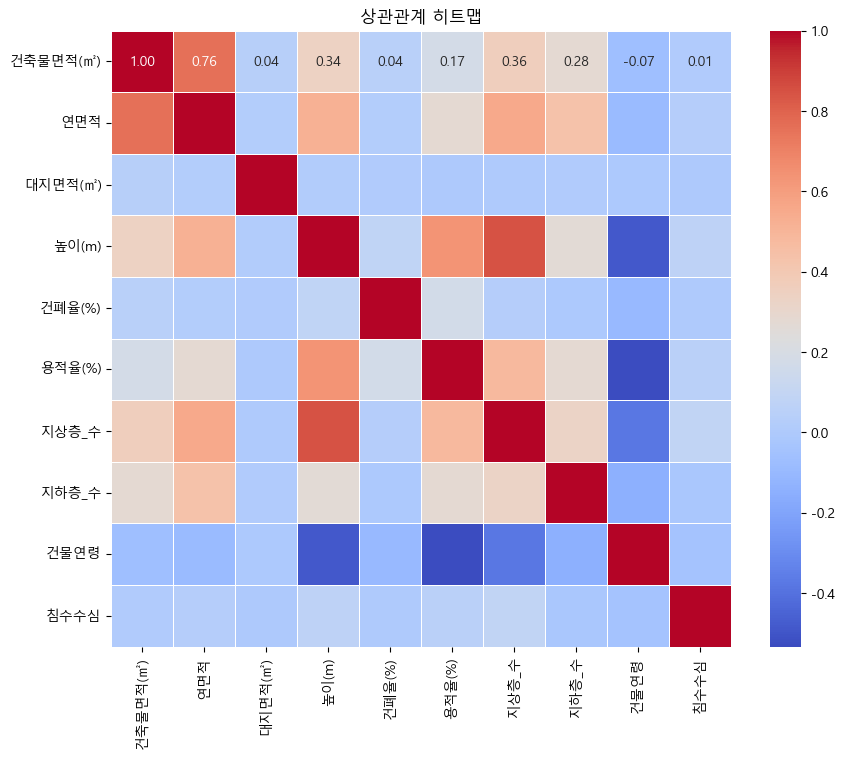

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager

font_path = './data/malgun.ttf'  # Windows의 경우
# font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # Linux의 경우
# font_path = '/Library/Fonts/AppleSDGothicNeo.ttc'  # macOS의 경우

font_prop = font_manager.FontProperties(fname=font_path, size=12)
plt.rc('font', family=font_prop.get_name())
plt.rcParams['axes.unicode_minus'] = False

numeric_df = 건물_침수_df.select_dtypes(include=['float64', 'int64'])

# 상관관계 행렬
correlation_matrix = numeric_df[['건축물면적(㎡)', '연면적', '대지면적(㎡)', '높이(m)', '건폐율(%)', '용적율(%)', '지상층_수', '지하층_수', '건물연령','침수수심']].corr()

# 상관관계 행렬을 히트맵으로 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('상관관계 히트맵')
plt.show()


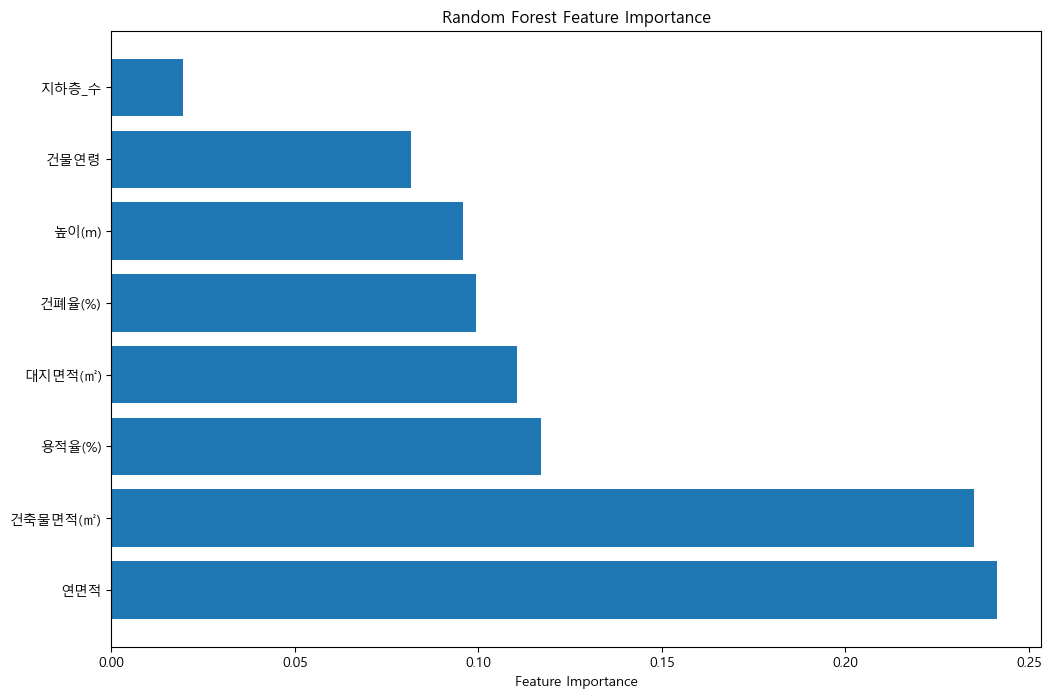

In [79]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import pandas as pd

# 데이터 준비
X = numeric_df[['건축물면적(㎡)', '연면적', '대지면적(㎡)', '높이(m)', '건폐율(%)', '용적율(%)', '지하층_수', '건물연령']]
y = numeric_df['침수수심']

# 모델 훈련
rf = RandomForestRegressor(n_estimators=4, random_state=42)
rf.fit(X, y)

# 변수 중요도 추출
importances = rf.feature_importances_
indices = importances.argsort()[::-1]

# 변수 중요도 시각화
plt.figure(figsize=(12, 8))
plt.title('Random Forest Feature Importance')
plt.barh(range(X.shape[1]), importances[indices], align='center')
plt.yticks(range(X.shape[1]), X.columns[indices])
plt.xlabel('Feature Importance')
plt.show()

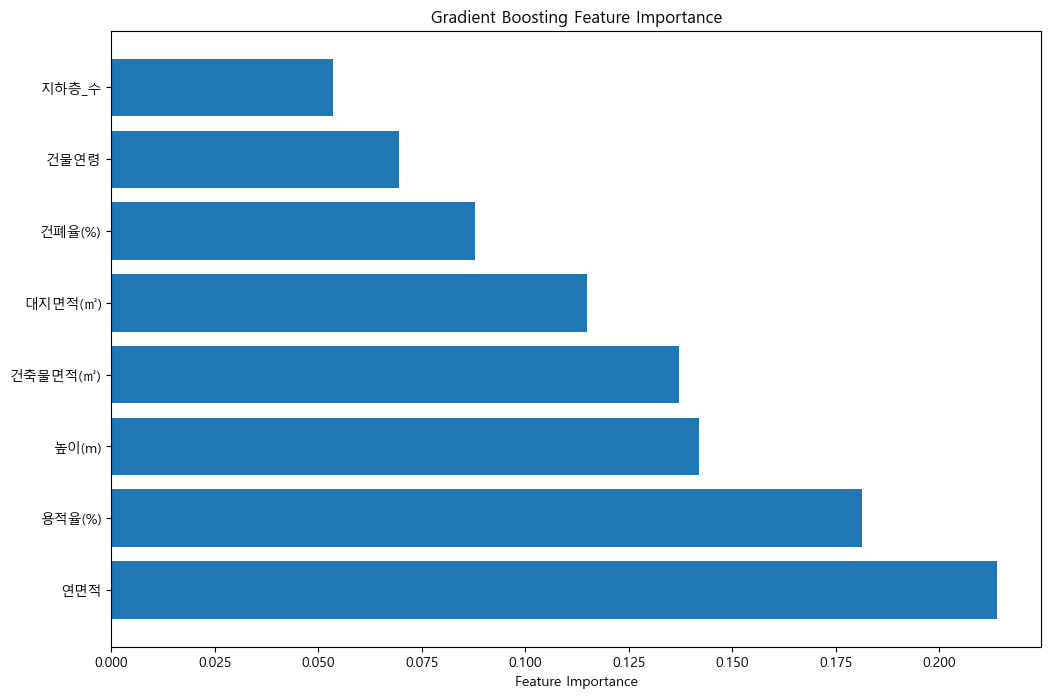

In [80]:
from sklearn.ensemble import GradientBoostingRegressor

# 모델 훈련
gbm = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbm.fit(X, y)

# 변수 중요도 추출
importances = gbm.feature_importances_
indices = importances.argsort()[::-1]

# 변수 중요도 시각화
plt.figure(figsize=(12, 8))
plt.title('Gradient Boosting Feature Importance')
plt.barh(range(X.shape[1]), importances[indices], align='center')
plt.yticks(range(X.shape[1]), X.columns[indices])
plt.xlabel('Feature Importance')
plt.show()

In [81]:
# !pip install xgboost

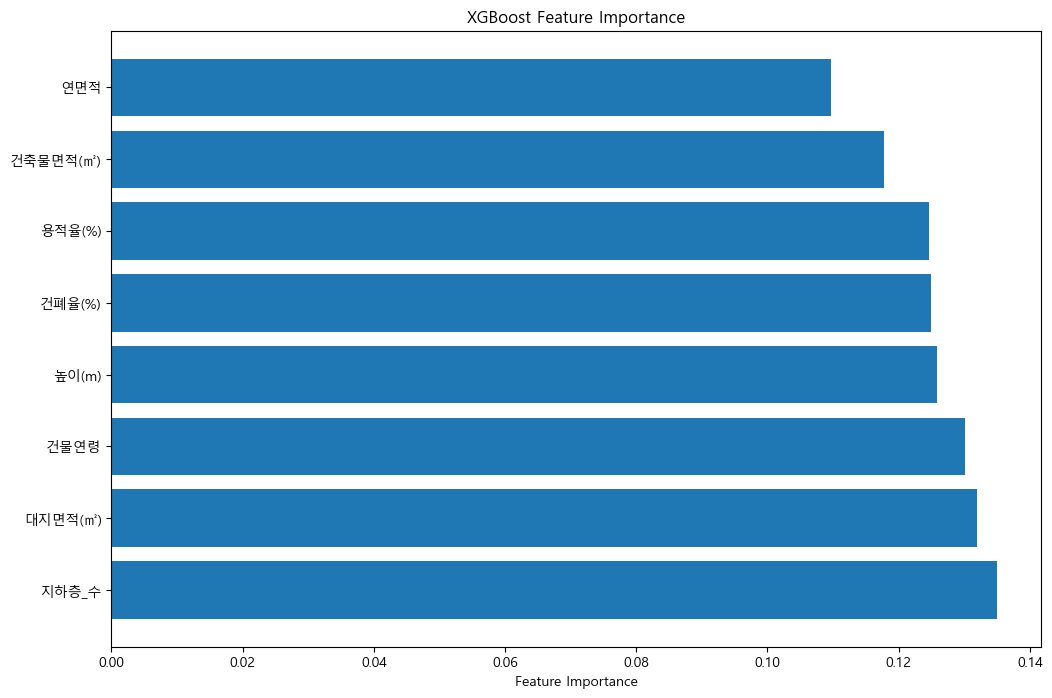

In [82]:
import xgboost as xgb

# XGBoost 모델 훈련
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X, y)

# 변수 중요도 추출
importances = xgb_model.feature_importances_
indices = importances.argsort()[::-1]

# 변수 중요도 시각화
plt.figure(figsize=(12, 8))
plt.title('XGBoost Feature Importance')
plt.barh(range(X.shape[1]), importances[indices], align='center')
plt.yticks(range(X.shape[1]), X.columns[indices])
plt.xlabel('Feature Importance')
plt.show()

In [83]:
from sklearn.ensemble import RandomForestRegressor

# 모델 훈련
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# 변수 중요도 추출
importances = rf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Random Forest Variable Importance:")
print(importance_df)

Random Forest Variable Importance:
    Feature  Importance
1       연면적    0.241988
0  건축물면적(㎡)    0.220684
2   대지면적(㎡)    0.118342
5    용적율(%)    0.113224
7      건물연령    0.100786
3     높이(m)    0.099677
4    건폐율(%)    0.085483
6     지하층_수    0.019817


In [84]:
from sklearn.ensemble import RandomForestRegressor

X = numeric_df[['침수평균해발고도', '침수면적']]

# 모델 훈련
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# 변수 중요도 추출
importances = rf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Random Forest Variable Importance:")
print(importance_df)

Random Forest Variable Importance:
    Feature  Importance
0  침수평균해발고도     0.55198
1      침수면적     0.44802


In [85]:
from sklearn.ensemble import GradientBoostingRegressor

# 모델 훈련
gbm = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbm.fit(X, y)

# 변수 중요도 추출
importances = gbm.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Gradient Boosting Variable Importance:")
print(importance_df)

Gradient Boosting Variable Importance:
    Feature  Importance
1      침수면적    0.557995
0  침수평균해발고도    0.442005


In [86]:
import xgboost as xgb

# XGBoost 모델 훈련
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X, y)

# 변수 중요도 추출
importances = xgb_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("XGBoost Variable Importance:")
print(importance_df)

XGBoost Variable Importance:
    Feature  Importance
0  침수평균해발고도    0.640899
1      침수면적    0.359101


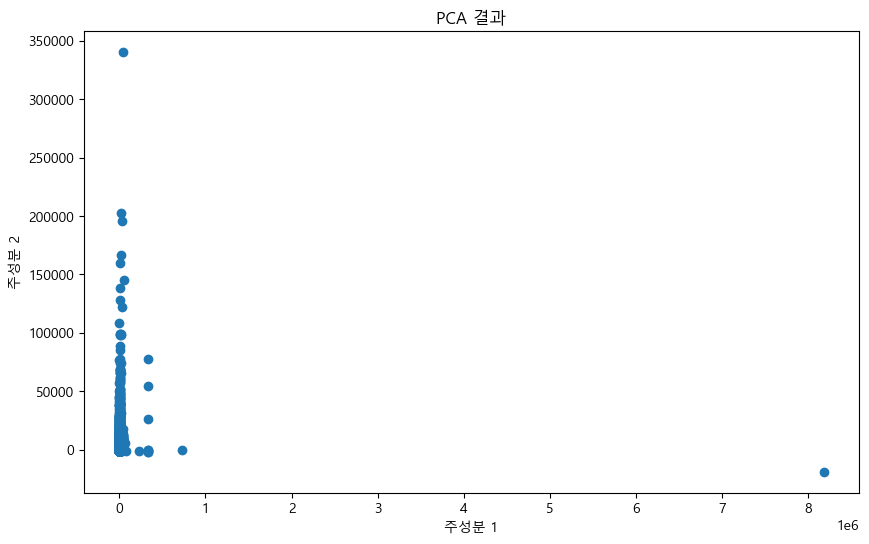

In [87]:
from sklearn.decomposition import PCA

# 데이터 준비
X = numeric_df[['건축물면적(㎡)', '연면적', '대지면적(㎡)', '높이(m)', '건폐율(%)', '용적율(%)', '지하층_수', '건물연령','침수평균해발고도','침수면적']].dropna()

# PCA 적용
pca = PCA(n_components=4)
principal_components = pca.fit_transform(X)

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.title('PCA 결과')
plt.xlabel('주성분 1')
plt.ylabel('주성분 2')
plt.show()

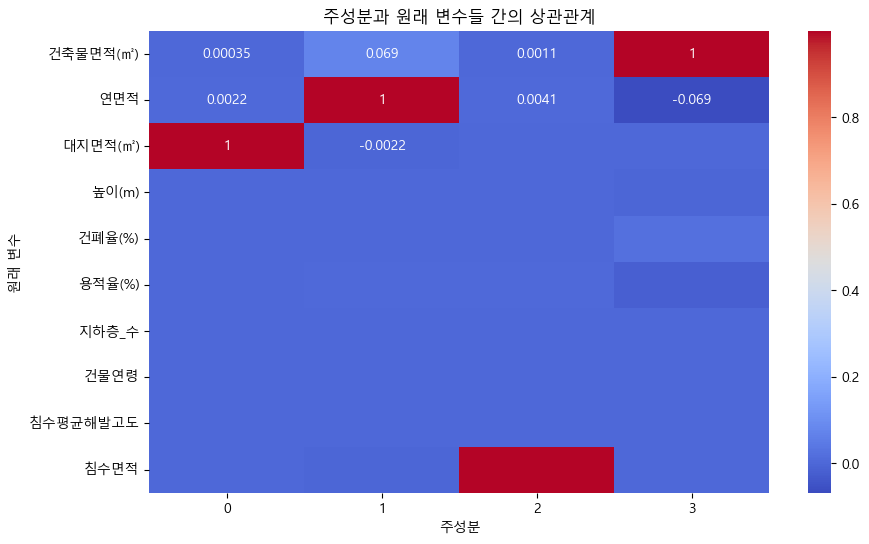

In [88]:
# 주성분과 원래 변수들 간의 상관관계 시각화
components = pd.DataFrame(pca.components_, columns=[['건축물면적(㎡)', '연면적', '대지면적(㎡)', '높이(m)', '건폐율(%)', '용적율(%)', '지하층_수', '건물연령','침수평균해발고도','침수면적']])
plt.figure(figsize=(10, 6))
sns.heatmap(components.T, annot=True, cmap='coolwarm', cbar=True)
plt.title('주성분과 원래 변수들 간의 상관관계')
plt.xlabel('주성분')
plt.ylabel('원래 변수')
plt.show()

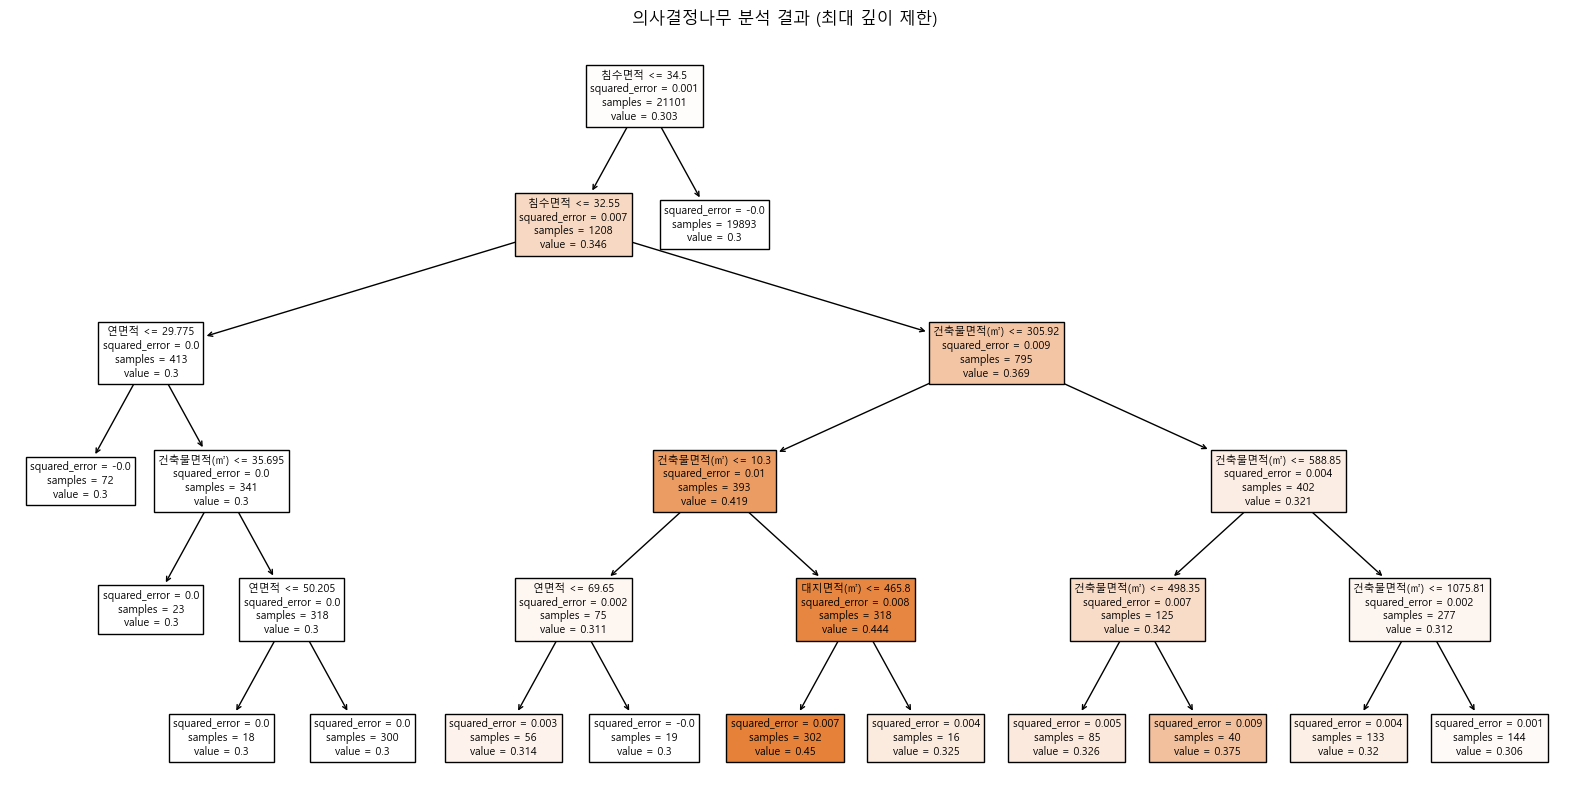

In [89]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 데이터 준비
X = numeric_df[['건축물면적(㎡)', '연면적', '대지면적(㎡)', '침수면적']].dropna()
y = numeric_df['침수수심'].dropna()

# 의사결정나무 모델 학습 (최대 깊이 제한)
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X, y)

# 의사결정나무 시각화
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=X.columns, filled=True)
plt.title('의사결정나무 분석 결과 (최대 깊이 제한)')
plt.show()

In [90]:
import pandas as pd

# 변수 중요도 확인
feature_importance = tree_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print(importance_df)

    Feature  Importance
3      침수면적    0.523968
0  건축물면적(㎡)    0.441714
2   대지면적(㎡)    0.033907
1       연면적    0.000411


In [91]:
건물_침수_df

,법정동명,지번,건축물면적(㎡),연면적,대지면적(㎡),높이(m),건폐율(%),용적율(%),지상층_수,지하층_수,...,침수수심,침수원인,침수평균해발고도,침수면적,침수시작날짜,침수종료날짜,침수시작시간,침수종료시간,침수내용,지오메트리
0,서울특별시 영등포구 영등포동2가,94-155,1199.710,17352.040,2163.00,61.00,55.47,569.16,14.0,3.0,...,0.3,2022년 8.8 ~17. 호우,9.72,57.00,20220808.0,20220810,20.0,24.0,내수침수,"POLYGON ((947908.9087317446 1946830.25634417, ..."
1,서울특별시 영등포구 신길동,268-21,127.560,120.960,99.57,0.00,124.42,121.48,2.0,0.0,...,0.3,2022년 8.8 ~17. 호우,14.30,114.25,20220808.0,20220810,20.0,24.0,내수침수,"POLYGON ((947561.6089984437 1944576.64633861, ..."
2,서울특별시 영등포구 신길동,4579,148.870,787.510,320.29,0.00,46.48,170.50,4.0,1.0,...,0.3,2022년 8.8 ~17. 호우,14.30,114.25,20220808.0,20220810,20.0,24.0,내수침수,"POLYGON ((947561.6089984437 1944576.64633861, ..."
4,서울특별시 영등포구 문래동3가,10,1464.000,1897.990,0.00,0.00,0.00,0.00,1.0,1.0,...,0.3,2022년 8.8 ~17. 호우,10.47,46.00,20220808.0,20220810,20.0,24.0,내수침수,"POLYGON ((947120.4038900363 1946360.953357358,..."
5,서울특별시 영등포구 신길동,359-11,66.300,265.200,0.00,0.00,0.00,0.00,3.0,1.0,...,0.3,2022년 8.8 ~17. 호우,14.30,114.25,20220808.0,20220810,20.0,24.0,내수침수,"POLYGON ((947561.6089984437 1944576.64633861, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21640,서울특별시 영등포구 대림동,710-13,356.500,1596.000,869.70,0.00,40.99,135.43,4.0,1.0,...,0.3,2022년 8.8 ~17. 호우,14.70,306.45,20220808.0,20220810,20.0,24.0,내수침수,"POLYGON ((947780.3274105673 1943886.278012975,..."
21641,서울특별시 영등포구 신길동,4273-12,470.230,4109.260,1129.96,29.35,41.61,247.36,7.0,2.0,...,0.3,2022년 8.8 ~17. 호우,14.30,114.25,20220808.0,20220810,20.0,24.0,내수침수,"POLYGON ((947561.6089984437 1944576.64633861, ..."
21642,서울특별시 영등포구 영등포동2가,217,89.750,297.280,0.00,0.00,0.00,0.00,3.0,1.0,...,0.3,2022년 8.8 ~17. 호우,9.72,57.00,20220808.0,20220810,20.0,24.0,내수침수,"POLYGON ((947908.9087317446 1946830.25634417, ..."
21643,서울특별시 영등포구 당산동6가,342,466.450,3230.140,840.70,29.70,55.48,302.32,7.0,1.0,...,0.3,2022년 8.8 ~17. 호우,12.70,48.00,20220808.0,20220810,20.0,24.0,내수침수,"POLYGON ((947143.5493483946 1948552.373099132,..."


In [92]:
건물_침수_df.columns

Index(['법정동명', '지번', '건축물면적(㎡)', '연면적', '대지면적(㎡)', '높이(m)', '건폐율(%)', '용적율(%)',
       '지상층_수', '지하층_수', '30년_이상', '건물연령', '행정코드', '침수수심', '침수원인', '침수평균해발고도',
       '침수면적', '침수시작날짜', '침수종료날짜', '침수시작시간', '침수종료시간', '침수내용', '지오메트리'],
      dtype='object')

In [93]:
건물_침수_df['주소'] = 건물_침수_df['법정동명'].astype(str) + 건물_침수_df['지번'].astype(str)

C:\Users\user\AppData\Local\Temp\ipykernel_18384\3551410736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  건물_침수_df['주소'] = 건물_침수_df['법정동명'].astype(str) + 건물_침수_df['지번'].astype(str)


In [94]:
건물_침수_df[['건축물면적(㎡)','대지면적(㎡)','침수면적', '지오메트리']]

,건축물면적(㎡),대지면적(㎡),침수면적,지오메트리
0,1199.710,2163.00,57.00,"POLYGON ((947908.9087317446 1946830.25634417, ..."
1,127.560,99.57,114.25,"POLYGON ((947561.6089984437 1944576.64633861, ..."
2,148.870,320.29,114.25,"POLYGON ((947561.6089984437 1944576.64633861, ..."
4,1464.000,0.00,46.00,"POLYGON ((947120.4038900363 1946360.953357358,..."
5,66.300,0.00,114.25,"POLYGON ((947561.6089984437 1944576.64633861, ..."
...,...,...,...,...
21640,356.500,869.70,306.45,"POLYGON ((947780.3274105673 1943886.278012975,..."
21641,470.230,1129.96,114.25,"POLYGON ((947561.6089984437 1944576.64633861, ..."
21642,89.750,0.00,57.00,"POLYGON ((947908.9087317446 1946830.25634417, ..."
21643,466.450,840.70,48.00,"POLYGON ((947143.5493483946 1948552.373099132,..."


In [95]:
# 침수 & 하천
# 데이터 준비
merged_river_data = 건물_침수_df[['건축물면적(㎡)','대지면적(㎡)','침수면적', '침수수심']].dropna()
X = merged_river_data[['건축물면적(㎡)','대지면적(㎡)','침수면적']]
y = merged_river_data['침수수심']

# 데이터 분할 (학습용 80%, 테스트용 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
# 의사결정나무 모델 학습
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# 예측 및 평가
y_pred_tree = tree_model.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
print(f'의사결정나무 MSE: {mse_tree}')

의사결정나무 MSE: 0.0002755453501722159


In [97]:
# 랜덤 포레스트 모델 학습
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# 예측 및 평가
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'랜덤 포레스트 MSE: {mse_rf}')

랜덤 포레스트 MSE: 0.0001777738551573971


In [98]:
# 모델 훈련
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 예측
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# MSE 계산
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"훈련 데이터 MSE: {train_mse}")
print(f"테스트 데이터 MSE: {test_mse}")

훈련 데이터 MSE: 4.031065233018395e-05
테스트 데이터 MSE: 0.0001777738551573971


In [99]:
from sklearn.model_selection import cross_val_score

# 모델 정의
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# 교차 검증 수행
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='neg_mean_squared_error')
mean_cv_score = -cv_scores.mean()  # MSE는 음수로 반환되므로 부호를 바꿉니다.

print(f"교차 검증을 통한 모델 MSE: {mean_cv_score}")

교차 검증을 통한 모델 MSE: 0.00026014373180547847


In [100]:
# 선형 회귀 모델 학습
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 예측 및 평가
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f'선형 회귀 MSE: {mse_lr}')

선형 회귀 MSE: 0.0004491142757377762


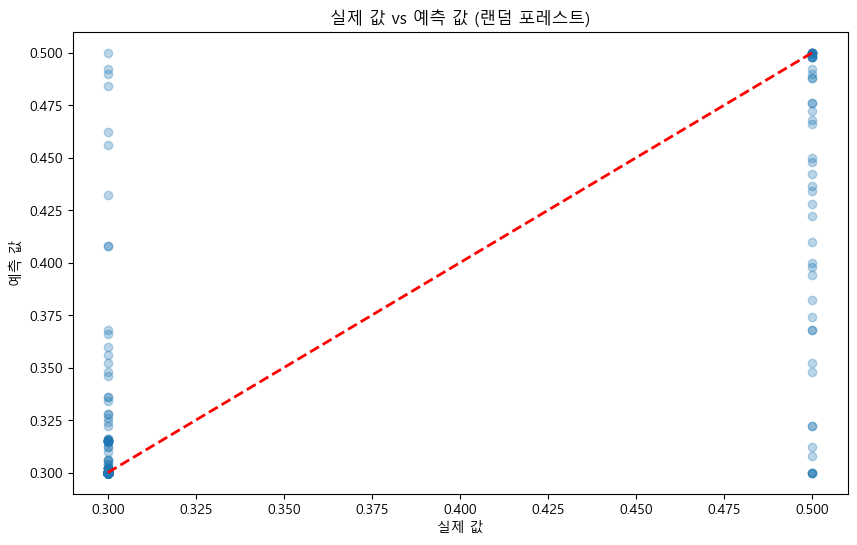

In [101]:
# 실제 값과 예측 값 비교 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2)
plt.xlabel('실제 값')
plt.ylabel('예측 값')
plt.title('실제 값 vs 예측 값 (랜덤 포레스트)')
plt.show()

In [102]:
건물_침수_df['침수수심'].value_counts()

침수수심
0.3    20825
0.5      276
Name: count, dtype: int64

In [103]:
침수_df['침수수심'].value_counts().sort_values(ascending=False)

침수수심
0.30    5586
0.50    1649
0.70     652
0.10     619
1.00     437
0.40     183
0.02     166
0.60     125
0.80      97
0.45      96
0.20      31
0.25      25
0.01      22
1.80      16
0.05      11
0.15       5
0.03       2
0.13       1
0.36       1
Name: count, dtype: int64

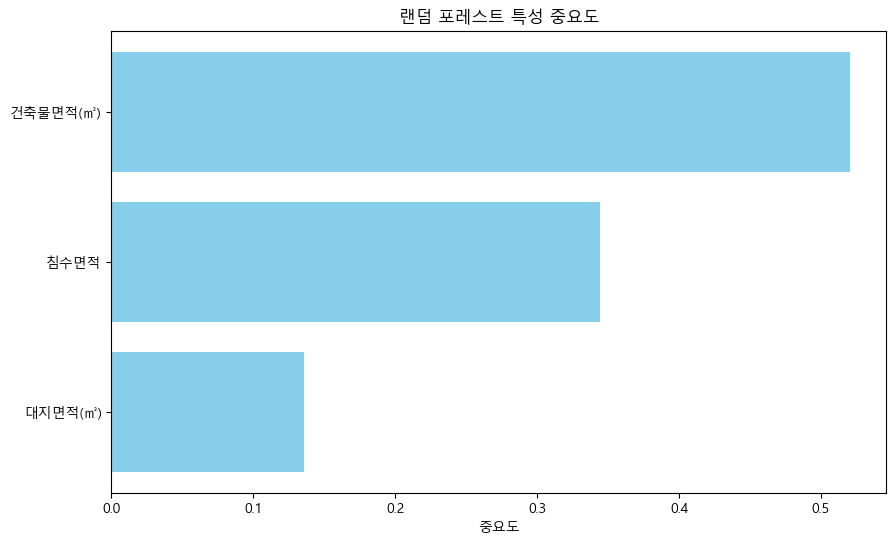

In [104]:
# 특성 중요도 시각화
feature_importance = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('중요도')
plt.title('랜덤 포레스트 특성 중요도')
plt.gca().invert_yaxis()
plt.show()

# map

In [105]:
# !pip install geopandas

In [106]:
# !pip install folium
# !pip install shapely
# !pip install geopy
# !pip install pyproj

In [107]:
# import folium
# from shapely import wkt
# from shapely.geometry import Point
# from geopy.geocoders import Nominatim
# from pyproj import Transformer
# import geopandas as gpd

In [108]:
# # 데이터 분할 (학습용 80%, 테스트용 20%)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
# X_train['대지면적(㎡)'].value_counts()

In [110]:
# # 랜덤 포레스트 모델 학습
# rf_model = RandomForestRegressor(random_state=42)
# rf_model.fit(X_train, y_train)

In [111]:
# # 예측
# y_pred_rf = rf_model.predict(X_test)

In [112]:
# # 지리적 좌표 (위도, 경도) 추가
# def get_lat_long(geometry, epsg_code="epsg:5179"):
#     transformer = Transformer.from_crs(epsg_code, "epsg:4326", always_xy=True)
#     centroid = geometry.centroid
#     lon, lat = transformer.transform(centroid.x, centroid.y)
#     return lat, lon 

In [113]:
# # EPSG:5179 사용하여 좌표 변환
# test_data = merged_data.loc[X_test.index].copy()
# test_data['위도'], test_data['경도'] = zip(*test_data['지오메트리'].apply(get_lat_long))
# test_data['예측수심'] = y_pred_rf

# # 디버깅: 변환된 좌표 확인
# print(test_data[['지오메트리', '위도', '경도', '예측수심']].head())

In [114]:
# # GeoDataFrame으로 변환
# gdf = gpd.GeoDataFrame(test_data, geometry='지오메트리')
# gdf.to_crs(epsg=5179, inplace=True)  # CRS 설정

In [115]:
# # Folium 지도에 예측 결과 시각화
# map_center = [test_data['위도'].mean(), test_data['경도'].mean()]
# map = folium.Map(location=map_center, zoom_start=11)  # 서울 중심으로 설정

In [116]:
# # 데이터 준비
# merged_build_data = 건물_침수_df[['지오메트리',  '건축물면적(㎡)','대지면적(㎡)','침수면적', '침수수심']].dropna()

# # 지오메트리 문자열을 Polygon 객체로 변환
# merged_build_data['지오메트리'] = merged_build_data['지오메트리'].apply(wkt.loads)

# X = merged_build_data[[ '건축물면적(㎡)','대지면적(㎡)','침수면적']]
# y = merged_build_data['침수수심']

# # 데이터 분할 (학습용 80%, 테스트용 20%)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 랜덤 포레스트 모델 학습
# rf_model = RandomForestRegressor(random_state=42)
# rf_model.fit(X_train, y_train)

# # 예측
# y_pred_rf = rf_model.predict(X_test)

# # 지리적 좌표 (위도, 경도) 추가
# def get_lat_long(geometry, epsg_code="epsg:5179"):
#     transformer = Transformer.from_crs(epsg_code, "epsg:4326", always_xy=True)
#     centroid = geometry.centroid
#     lon, lat = transformer.transform(centroid.x, centroid.y)
#     return lat, lon


# # EPSG:5179 사용하여 좌표 변환
# test_data = merged_build_data.loc[X_test.index].copy()
# test_data['위도'], test_data['경도'] = zip(*test_data['지오메트리'].apply(get_lat_long))
# test_data['예측수심'] = y_pred_rf

# # GeoDataFrame으로 변환
# gdf = gpd.GeoDataFrame(test_data, geometry='지오메트리')
# gdf.set_crs(epsg=5179, inplace=True)  # CRS 설정

# # Folium 지도에 예측 결과 시각화
# map_center = [test_data['위도'].mean(), test_data['경도'].mean()]
# map = folium.Map(location=map_center, zoom_start=11)  # 서울 중심으로 설정

In [117]:
# # GeoJson 추가
# folium.Choropleth(
#     geo_data=gdf,
#     name='침수수심 예측',
#     data=gdf,
#     columns=['지오메트리', '예측수심'],
#     key_on='feature.id',
#     fill_color='YlOrRd',
#     fill_opacity=0.7,
#     line_opacity=0.2,
#     legend_name='예측 침수수심 (m)'
# ).add_to(map)

# # GeoJson 스타일 적용
# style_function = lambda x: {
#     'fillColor': '#ff0000' if x['properties']['예측수심'] > 0.3 else '#ffff00' ,
#     'color': 'black',
#     'weight': 1,
#     'fillOpacity': 0.6
# }

# highlight_function = lambda x: {'weight': 3, 'fillOpacity': 0.9}

# folium.GeoJson(
#     gdf,
#     style_function=style_function,
#     highlight_function=highlight_function,
#     tooltip=folium.GeoJsonTooltip(
#         fields=['예측수심'],
#         aliases=['예측 침수수심: '],
#         localize=True
#     )
# ).add_to(map)

# # 지도 저장
# map.save("flood_prediction_map_colored.html")
            

# 데이터 합치기 전 변수 처리

In [251]:
건물_df = 건물_df[건물_df['건축물면적(㎡)'] != 0.00]

In [252]:
건물_df['건축물면적(㎡)'].value_counts().sort_values(ascending=False)

건축물면적(㎡)
57.600      1
49.670      1
279.980     1
29.090      1
205.560     1
           ..
422.800     1
42.685      1
30.620      1
79.765      1
1158.040    1
Name: count, Length: 56893, dtype: int64

In [253]:
# 건축물면적의 빈도 수를 구하고, 이를 DataFrame으로 변환
value_counts_df = 건물_df['건축물면적(㎡)'].value_counts().reset_index()
value_counts_df.columns = ['건축물면적(㎡)', '빈도수']

# 건축물면적 크기에 따라 내림차순으로 정렬
sorted_df = value_counts_df.sort_values(by='건축물면적(㎡)', ascending=False)

print(sorted_df)

         건축물면적(㎡)  빈도수
5441   1077005.00    1
19717   830110.00    1
19655   595200.00    1
22182   575979.00    1
19995   389510.00    1
...           ...  ...
19928        1.10    1
7444         0.83    1
19859        0.81    1
14082        0.10    1
13459        0.01    1

[56893 rows x 2 columns]


In [254]:
건물_df[건물_df['건축물면적(㎡)'] == 1077005.00]

,법정동명,자치구,지번,건축물면적(㎡),연면적,대지면적(㎡),높이(m),건폐율(%),용적율(%),지상층_수,지하층_수,20년_30년미만,30년_이상,건물연령,행정코드,소재지,존재여부
307545,서울특별시 양천구 신월동,양천구,1042,1077005.0,11808.116,3728.1,36.0,28.89,249.77,13.0,1.0,False,False,18,1147010300,서울특별시 양천구 신월동,존재


In [255]:
# 구간 설정
bins = pd.cut(건물_df['건축물면적(㎡)'], bins=5)
print(bins.value_counts())  # 각 구간의 빈도수 확인

건축물면적(㎡)
(-1076.995, 215401.008]     56887
(215401.008, 430802.006]        2
(430802.006, 646203.004]        2
(646203.004, 861604.002]        1
(861604.002, 1077005.0]         1
Name: count, dtype: int64


In [257]:
건물_df['건축물면적(㎡)'].isnull().sum()

0

In [258]:
건물_df['건축물면적(㎡)'] = 건물_df['건축물면적(㎡)'].dropna()

In [259]:
건물_df= 건물_df.drop_duplicates(subset=['건축물면적(㎡)'])

In [260]:
print(건물_df['건축물면적(㎡)'].isna().sum())

0


In [261]:
건물_df = 건물_df.dropna(subset=['건축물면적(㎡)'])

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


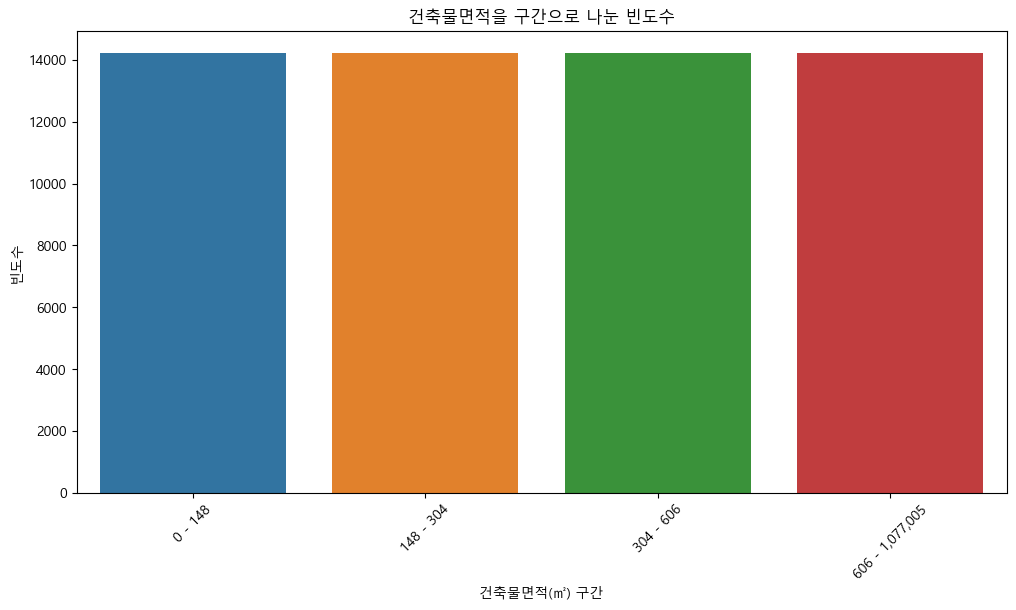

In [262]:
import numpy as np

# 데이터의 백분위수 계산
quantiles = np.percentile(건물_df['건축물면적(㎡)'], [0, 25, 50, 75, 100])

# 구간 라벨 생성
labels = [f'{quantiles[i]:,.0f} - {quantiles[i+1]:,.0f}' for i in range(len(quantiles)-1)]

# 구간 설정
binned_df = 건물_df.copy()
binned_df['구간'] = pd.cut(건물_df['건축물면적(㎡)'], bins=quantiles, labels=labels, include_lowest=True)

# 구간별 빈도수 계산
freq_table = binned_df['구간'].value_counts().sort_index()

# 빈도수를 히스토그램으로 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=freq_table.index, y=freq_table.values)
plt.xlabel('건축물면적(㎡) 구간')
plt.ylabel('빈도수')
plt.title('건축물면적을 구간으로 나눈 빈도수')
plt.xticks(rotation=45)
plt.show()

In [263]:
binned_df['구간'].value_counts()

구간
0 - 148            14224
148 - 304          14223
304 - 606          14223
606 - 1,077,005    14223
Name: count, dtype: int64

In [264]:
building_df = binned_df

In [265]:
building_df

,법정동명,자치구,지번,건축물면적(㎡),연면적,대지면적(㎡),높이(m),건폐율(%),용적율(%),지상층_수,지하층_수,20년_30년미만,30년_이상,건물연령,행정코드,소재지,존재여부,구간
0,서울특별시 종로구 숭인동,종로구,704,57.600,203.13,100.600,9.10,57.26,144.66202,3.0,0.0,False,True,33,1111017500,서울특별시 종로구 숭인동,존재,0 - 148
4,서울특별시 종로구 이화동,종로구,28-41,100.050,598.27,229.800,14.70,43.53,204.66000,5.0,1.0,False,True,30,1111016500,서울특별시 종로구 이화동,존재,0 - 148
6,서울특별시 종로구 창신동,종로구,627-34,29.090,57.11,48.880,4.50,59.51,57.32000,1.0,1.0,True,False,26,1111017400,서울특별시 종로구 창신동,존재,0 - 148
7,서울특별시 종로구 창신동,종로구,627-21,205.560,1247.85,343.400,18.70,59.86,279.64000,5.0,1.0,True,False,27,1111017400,서울특별시 종로구 창신동,존재,148 - 304
10,서울특별시 종로구 창신동,종로구,23-29,53.260,84.90,90.200,5.00,59.05,55.28000,1.0,1.0,True,False,29,1111017400,서울특별시 종로구 창신동,존재,0 - 148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543824,서울특별시 성동구 성수동1가,성동구,155-1,30.620,91.86,61.350,7.00,49.91,99.82000,2.0,1.0,False,True,34,1120011400,서울특별시 성동구 성수동1가,존재,0 - 148
544344,서울특별시 성동구 성수동2가,성동구,299-253,79.765,143.01,79.765,9.80,59.76,179.29000,3.0,0.0,False,True,31,1120011500,서울특별시 성동구 성수동2가,존재,0 - 148
544449,서울특별시 광진구 자양동,광진구,761,1638.210,23140.79,0.000,52.15,0.00,0.00000,19.0,1.0,True,False,29,1121510500,서울특별시 광진구 자양동,존재,"606 - 1,077,005"
544484,서울특별시 서초구 서초동,서초구,1344-8,256.430,816.40,626.200,18.00,40.95,90.52000,3.0,1.0,False,True,44,1165010800,서울특별시 서초구 서초동,존재,148 - 304


In [266]:
# 법정동명과 구간 기준으로 그룹화하여 개수 세기
bulid_count = building_df.groupby(['법정동명', '구간']).size().reset_index(name='개수')

bulid_count

C:\Users\user\AppData\Local\Temp\ipykernel_18384\4091166516.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bulid_count = building_df.groupby(['법정동명', '구간']).size().reset_index(name='개수')


,법정동명,구간,개수
0,서울특별시 강남구 개포동,0 - 148,9
1,서울특별시 강남구 개포동,148 - 304,16
2,서울특별시 강남구 개포동,304 - 606,84
3,서울특별시 강남구 개포동,"606 - 1,077,005",79
4,서울특별시 강남구 논현동,0 - 148,20
...,...,...,...
1851,서울특별시 중랑구 신내동,"606 - 1,077,005",81
1852,서울특별시 중랑구 중화동,0 - 148,44
1853,서울특별시 중랑구 중화동,148 - 304,132
1854,서울특별시 중랑구 중화동,304 - 606,62


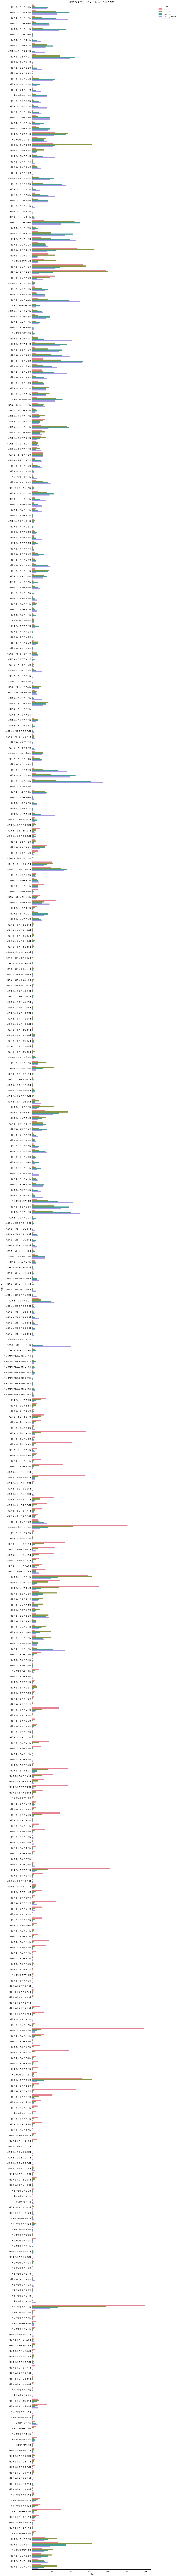

In [267]:
# 수평 막대그래프 생성
plt.figure(figsize=(14, 200))

# 색상 팔레트 설정 (각 구간별 색상 설정)
palette = sns.color_palette("husl", len(bulid_count['구간'].unique()))

bar_plot = sns.barplot(x='개수', y='법정동명', hue='구간', data=bulid_count, dodge=True, palette=palette)

# 범례 추가
handles, labels = bar_plot.get_legend_handles_labels()
plt.legend(handles, labels, title='구간', bbox_to_anchor=(1.05, 1), loc='upper left')

# 축 레이블 및 제목 설정
plt.xlabel('개수')
plt.ylabel('법정동명')
plt.title('법정동명별 면적 구간별 개수 (수평 막대그래프)')

# 레이아웃 조정
plt.tight_layout()
plt.show()

In [268]:
건물_df[건물_df['법정동명'] == '서울특별시 종로구 종로4가']

,법정동명,자치구,지번,건축물면적(㎡),연면적,대지면적(㎡),높이(m),건폐율(%),용적율(%),지상층_수,지하층_수,20년_30년미만,30년_이상,건물연령,행정코드,소재지,존재여부
10140,서울특별시 종로구 종로4가,종로구,165-5,468.76,2729.50,0.0,0.00,0.0000,0.0000,7.0,0.0,False,True,64,1111016100,서울특별시 종로구 종로4가,존재
10605,서울특별시 종로구 종로4가,종로구,9-1,166.25,1139.84,281.4,22.30,59.0796,292.5195,6.0,2.0,False,True,39,1111016100,서울특별시 종로구 종로4가,존재
10947,서울특별시 종로구 종로4가,종로구,5,665.88,11095.13,1666.8,50.45,39.9496,493.1246,13.0,3.0,False,True,40,1111016100,서울특별시 종로구 종로4가,존재


In [269]:
# 구간별 전체 건물 개수 계산
total_buildings_per_range = building_df['구간'].value_counts().reset_index()
total_buildings_per_range.columns = ['구간', '전체_건물_개수']

# 30년 이상 된 건물만 필터링
df_30_years_or_more = building_df[building_df['30년_이상'] == True]

# 구간별 30년 이상 된 건물 개수 계산
buildings_30_years_per_range = df_30_years_or_more['구간'].value_counts().reset_index()
buildings_30_years_per_range.columns = ['구간', '30년_이상_건물_개수']

# 두 데이터프레임을 구간을 기준으로 병합
result_df = pd.merge(total_buildings_per_range, buildings_30_years_per_range, on='구간', how='left')

# 30년 이상의 건물이 없는 구간은 0으로 채우기 전에, '30년_이상_건물_개수' 열의 타입을 float으로 변경합니다.
result_df['30년_이상_건물_개수'] = result_df['30년_이상_건물_개수'].fillna(0).astype(int)

result_df

,구간,전체_건물_개수,30년_이상_건물_개수
0,0 - 148,14224,7216
1,148 - 304,14223,5103
2,304 - 606,14223,5263
3,"606 - 1,077,005",14223,5182


In [270]:
# 전체 건물 개수 계산
total_buildings_per_range = building_df.groupby(['법정동명', '구간']).size().reset_index(name='구간_count')

# 30년 이상 건물만 필터링
df_30_years_or_more = building_df[building_df['30년_이상'] == True]

# 30년 이상 건물 개수 계산
buildings_30_years_per_range = df_30_years_or_more.groupby(['법정동명','구간']).size().reset_index(name='30년_이상_건물_count')


# 두 데이터프레임을 법정동명과 구간을 기준으로 병합
result_df = pd.merge(total_buildings_per_range, buildings_30_years_per_range, on=['법정동명', '구간'], how='left')

# 30년 이상의 건물이 없는 경우 0으로 채우기
result_df['30년_이상_건물_count'].fillna(0, inplace=True)
result_df['30년_이상_건물_count'] = result_df['30년_이상_건물_count'].astype(int)

result_df

C:\Users\user\AppData\Local\Temp\ipykernel_18384\2994069727.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_buildings_per_range = building_df.groupby(['법정동명', '구간']).size().reset_index(name='구간_count')
C:\Users\user\AppData\Local\Temp\ipykernel_18384\2994069727.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  buildings_30_years_per_range = df_30_years_or_more.groupby(['법정동명','구간']).size().reset_index(name='30년_이상_건물_count')


,법정동명,구간,구간_count,30년_이상_건물_count
0,서울특별시 강남구 개포동,0 - 148,9,5
1,서울특별시 강남구 개포동,148 - 304,16,9
2,서울특별시 강남구 개포동,304 - 606,84,62
3,서울특별시 강남구 개포동,"606 - 1,077,005",79,54
4,서울특별시 강남구 논현동,0 - 148,20,10
...,...,...,...,...
1851,서울특별시 중랑구 신내동,"606 - 1,077,005",81,10
1852,서울특별시 중랑구 중화동,0 - 148,44,17
1853,서울특별시 중랑구 중화동,148 - 304,132,54
1854,서울특별시 중랑구 중화동,304 - 606,62,26


In [271]:
# 지하층 수가 1 이상인 건물 필터링
df_basement_1_or_more = building_df[building_df['지하층_수'] >= 1]

# 지하층 수가 1 이상인 건물 개수 계산
basement_1_count_per_range = df_basement_1_or_more.groupby(['법정동명', '구간']).size().reset_index(name='지하_건물_count')

# 기존 데이터프레임과 병합
result_df = pd.merge(result_df, basement_1_count_per_range, on=['법정동명', '구간'], how='left')

# 지하층 수가 1 이상인 건물이 없는 경우 0으로 채우기
result_df['지하_건물_count'].fillna(0, inplace=True)
result_df['지하_건물_count'] = result_df['지하_건물_count'].astype(int)


result_df

C:\Users\user\AppData\Local\Temp\ipykernel_18384\4199120895.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  basement_1_count_per_range = df_basement_1_or_more.groupby(['법정동명', '구간']).size().reset_index(name='지하_건물_count')


,법정동명,구간,구간_count,30년_이상_건물_count,지하_건물_count
0,서울특별시 강남구 개포동,0 - 148,9,5,6
1,서울특별시 강남구 개포동,148 - 304,16,9,12
2,서울특별시 강남구 개포동,304 - 606,84,62,65
3,서울특별시 강남구 개포동,"606 - 1,077,005",79,54,69
4,서울특별시 강남구 논현동,0 - 148,20,10,13
...,...,...,...,...,...
1851,서울특별시 중랑구 신내동,"606 - 1,077,005",81,10,67
1852,서울특별시 중랑구 중화동,0 - 148,44,17,19
1853,서울특별시 중랑구 중화동,148 - 304,132,54,76
1854,서울특별시 중랑구 중화동,304 - 606,62,26,49


In [272]:
result_df[result_df['법정동명']== '서울특별시 종로구 종로4가']

,법정동명,구간,구간_count,30년_이상_건물_count,지하_건물_count
1444,서울특별시 종로구 종로4가,0 - 148,0,0,0
1445,서울특별시 종로구 종로4가,148 - 304,1,1,1
1446,서울특별시 종로구 종로4가,304 - 606,1,1,0
1447,서울특별시 종로구 종로4가,"606 - 1,077,005",1,1,1


In [273]:
# 지하층 수가 1 이상인 건물만 필터링
df_basement_1_or_more = building_df[building_df['지하층_수'] >= 1]

# 각 행정동과 구간별로 평균 높이 계산
average_height_per_range = df_basement_1_or_more.groupby(['법정동명', '구간'])['높이(m)'].mean().reset_index(name='평균_높이(m)')

# 기존 데이터프레임과 병합
result_df_tp = pd.merge(result_df, average_height_per_range, on=['법정동명', '구간'], how='left')

result_df_tp

C:\Users\user\AppData\Local\Temp\ipykernel_18384\3536877592.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_height_per_range = df_basement_1_or_more.groupby(['법정동명', '구간'])['높이(m)'].mean().reset_index(name='평균_높이(m)')


,법정동명,구간,구간_count,30년_이상_건물_count,지하_건물_count,평균_높이(m)
0,서울특별시 강남구 개포동,0 - 148,9,5,6,9.866667
1,서울특별시 강남구 개포동,148 - 304,16,9,12,10.851667
2,서울특별시 강남구 개포동,304 - 606,84,62,65,9.282769
3,서울특별시 강남구 개포동,"606 - 1,077,005",79,54,69,9.951159
4,서울특별시 강남구 논현동,0 - 148,20,10,13,9.293077
...,...,...,...,...,...,...
1851,서울특별시 중랑구 신내동,"606 - 1,077,005",81,10,67,31.938209
1852,서울특별시 중랑구 중화동,0 - 148,44,17,19,3.357895
1853,서울특별시 중랑구 중화동,148 - 304,132,54,76,6.596513
1854,서울특별시 중랑구 중화동,304 - 606,62,26,49,12.651837


In [274]:
# 자치구 추출 함수
def extract_gu(dong_name):
    # '서울특별시 ' 부분을 제거하고, 그 뒤의 첫 번째 '구'까지 잘라낸다
    parts = dong_name.split(' ')
    if len(parts) > 1:
        return parts[1]
    return ''

# '자치구' 컬럼 생성
result_df_tp['자치구'] = result_df_tp['법정동명'].apply(extract_gu)

In [275]:
result_df_tp

,법정동명,구간,구간_count,30년_이상_건물_count,지하_건물_count,평균_높이(m),자치구
0,서울특별시 강남구 개포동,0 - 148,9,5,6,9.866667,강남구
1,서울특별시 강남구 개포동,148 - 304,16,9,12,10.851667,강남구
2,서울특별시 강남구 개포동,304 - 606,84,62,65,9.282769,강남구
3,서울특별시 강남구 개포동,"606 - 1,077,005",79,54,69,9.951159,강남구
4,서울특별시 강남구 논현동,0 - 148,20,10,13,9.293077,강남구
...,...,...,...,...,...,...,...
1851,서울특별시 중랑구 신내동,"606 - 1,077,005",81,10,67,31.938209,중랑구
1852,서울특별시 중랑구 중화동,0 - 148,44,17,19,3.357895,중랑구
1853,서울특별시 중랑구 중화동,148 - 304,132,54,76,6.596513,중랑구
1854,서울특별시 중랑구 중화동,304 - 606,62,26,49,12.651837,중랑구


In [276]:
result_df_tp[result_df_tp['법정동명']== '서울특별시 종로구 종로4가']

,법정동명,구간,구간_count,30년_이상_건물_count,지하_건물_count,평균_높이(m),자치구
1444,서울특별시 종로구 종로4가,0 - 148,0,0,0,NaN,종로구
1445,서울특별시 종로구 종로4가,148 - 304,1,1,1,22.30,종로구
1446,서울특별시 종로구 종로4가,304 - 606,1,1,0,NaN,종로구
1447,서울특별시 종로구 종로4가,"606 - 1,077,005",1,1,1,50.45,종로구


In [291]:
result_df_tp['자치구'].unique()

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

In [293]:
gu = ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']

new_li = []

for i in gu:
    # '법정동명' 컬럼에서 '강남구'가 포함된 행 필터링
    filtered_df = result_df_tp[result_df_tp['법정동명'].str.contains(i)]

    # '법정동명' 컬럼에서 중복을 제거하고 유니크한 값만 보기
    new_li.append(filtered_df['법정동명'].unique())
    

new_li[1]

array(['서울특별시 강동구 강일동', '서울특별시 강동구 고덕동', '서울특별시 강동구 길동', '서울특별시 강동구 둔촌동',
       '서울특별시 강동구 명일동', '서울특별시 강동구 상일동', '서울특별시 강동구 성내동', '서울특별시 강동구 암사동',
       '서울특별시 강동구 천호동'], dtype=object)

In [279]:
result_df_tp['평균_높이(m)'] = result_df_tp['평균_높이(m)'].fillna(0)

In [280]:
result_df_tp.isnull().sum()

법정동명               0
구간                 0
구간_count           0
30년_이상_건물_count    0
지하_건물_count        0
평균_높이(m)           0
자치구                0
dtype: int64

In [281]:
result_df_tp[result_df_tp['평균_높이(m)'] == 0]

,법정동명,구간,구간_count,30년_이상_건물_count,지하_건물_count,평균_높이(m),자치구
16,서울특별시 강남구 삼성동,0 - 148,6,1,1,0.0,강남구
20,서울특별시 강남구 세곡동,0 - 148,0,0,0,0.0,강남구
24,서울특별시 강남구 수서동,0 - 148,0,0,0,0.0,강남구
32,서울특별시 강남구 압구정동,0 - 148,0,0,0,0.0,강남구
33,서울특별시 강남구 압구정동,148 - 304,0,0,0,0.0,강남구
...,...,...,...,...,...,...,...
1792,서울특별시 중구 태평로1가,0 - 148,1,1,0,0.0,중구
1796,서울특별시 중구 태평로2가,0 - 148,2,2,0,0.0,중구
1802,서울특별시 중구 필동1가,304 - 606,2,2,2,0.0,중구
1824,서울특별시 중구 회현동3가,0 - 148,3,2,0,0.0,중구


In [282]:
result_df_tp.columns

Index(['법정동명', '구간', '구간_count', '30년_이상_건물_count', '지하_건물_count', '평균_높이(m)',
       '자치구'],
      dtype='object')

In [283]:

mapping = {
    '법정동명': '법정동명',
    '구간': '건물면적_분포구간',
    '구간_count': '건물면적_구간별_분포수',
    '30년_이상_건물_count': '구간별_30년_이상_건물_수',
    '지하_건물_count': '구간별_지하_건물_수',
    '평균_높이(m)': '구간별_평균_높이(m)',
    '자치구': '자치구'
}

# 컬럼 이름 변경
result_df_tp = result_df_tp.rename(columns=mapping)

In [284]:
result_df_tp

,법정동명,건물면적_분포구간,건물면적_구간별_분포수,구간별_30년_이상_건물_수,구간별_지하_건물_수,구간별_평균_높이(m),자치구
0,서울특별시 강남구 개포동,0 - 148,9,5,6,9.866667,강남구
1,서울특별시 강남구 개포동,148 - 304,16,9,12,10.851667,강남구
2,서울특별시 강남구 개포동,304 - 606,84,62,65,9.282769,강남구
3,서울특별시 강남구 개포동,"606 - 1,077,005",79,54,69,9.951159,강남구
4,서울특별시 강남구 논현동,0 - 148,20,10,13,9.293077,강남구
...,...,...,...,...,...,...,...
1851,서울특별시 중랑구 신내동,"606 - 1,077,005",81,10,67,31.938209,중랑구
1852,서울특별시 중랑구 중화동,0 - 148,44,17,19,3.357895,중랑구
1853,서울특별시 중랑구 중화동,148 - 304,132,54,76,6.596513,중랑구
1854,서울특별시 중랑구 중화동,304 - 606,62,26,49,12.651837,중랑구


In [285]:
result_df_tp.isnull().sum()

법정동명               0
건물면적_분포구간          0
건물면적_구간별_분포수       0
구간별_30년_이상_건물_수    0
구간별_지하_건물_수        0
구간별_평균_높이(m)       0
자치구                0
dtype: int64

In [288]:
result_df_tp.to_csv('./data/건물면적.csv', index=False)

In [286]:
건물_df

,법정동명,자치구,지번,건축물면적(㎡),연면적,대지면적(㎡),높이(m),건폐율(%),용적율(%),지상층_수,지하층_수,20년_30년미만,30년_이상,건물연령,행정코드,소재지,존재여부
0,서울특별시 종로구 숭인동,종로구,704,57.600,203.13,100.600,9.10,57.26,144.66202,3.0,0.0,False,True,33,1111017500,서울특별시 종로구 숭인동,존재
4,서울특별시 종로구 이화동,종로구,28-41,100.050,598.27,229.800,14.70,43.53,204.66000,5.0,1.0,False,True,30,1111016500,서울특별시 종로구 이화동,존재
6,서울특별시 종로구 창신동,종로구,627-34,29.090,57.11,48.880,4.50,59.51,57.32000,1.0,1.0,True,False,26,1111017400,서울특별시 종로구 창신동,존재
7,서울특별시 종로구 창신동,종로구,627-21,205.560,1247.85,343.400,18.70,59.86,279.64000,5.0,1.0,True,False,27,1111017400,서울특별시 종로구 창신동,존재
10,서울특별시 종로구 창신동,종로구,23-29,53.260,84.90,90.200,5.00,59.05,55.28000,1.0,1.0,True,False,29,1111017400,서울특별시 종로구 창신동,존재
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543824,서울특별시 성동구 성수동1가,성동구,155-1,30.620,91.86,61.350,7.00,49.91,99.82000,2.0,1.0,False,True,34,1120011400,서울특별시 성동구 성수동1가,존재
544344,서울특별시 성동구 성수동2가,성동구,299-253,79.765,143.01,79.765,9.80,59.76,179.29000,3.0,0.0,False,True,31,1120011500,서울특별시 성동구 성수동2가,존재
544449,서울특별시 광진구 자양동,광진구,761,1638.210,23140.79,0.000,52.15,0.00,0.00000,19.0,1.0,True,False,29,1121510500,서울특별시 광진구 자양동,존재
544484,서울특별시 서초구 서초동,서초구,1344-8,256.430,816.40,626.200,18.00,40.95,90.52000,3.0,1.0,False,True,44,1165010800,서울특별시 서초구 서초동,존재


In [287]:
건물_df.columns

Index(['법정동명', '자치구', '지번', '건축물면적(㎡)', '연면적', '대지면적(㎡)', '높이(m)', '건폐율(%)',
       '용적율(%)', '지상층_수', '지하층_수', '20년_30년미만', '30년_이상', '건물연령', '행정코드',
       '소재지', '존재여부'],
      dtype='object')